# Data loading 
Next cells are used to load the data we need.

In [1]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('..')


In [2]:
#data which contains users (row), items(col) and implicit interaction (data)
dataset = pd.read_csv('data_train.csv')
dataset

,row,col,data
0,0,10080,1.0
1,0,19467,1.0
2,1,2665,1.0
3,1,7494,1.0
4,1,17068,1.0
...,...,...,...
113263,7945,2476,1.0
113264,7945,12319,1.0
113265,7945,21384,1.0
113266,7946,8699,1.0


# Data pre-processing
Pre-processing of data to check for missing users, items ecc...

In [3]:
users = dataset.row
items = dataset.col
data = dataset.data
URM_all = sps.coo_matrix((data, (users, items)))
URM_all = URM_all.tocsr() #fast row access -> fast access to users 
URM_all.shape

(7947, 25975)

In [4]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

#splitting data into train and validation (from the previous training data)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)



In [5]:
#evaluator for validation (used for hyperparameter tuning)
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])

#evaluator for testing (the final one)
#evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [6]:
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython

recommender = SLIM_BPR_Cython(URM_train, recompile_cython=False)

SLIM_BPR_Recommender: URM Detected 36 (0.45 %) cold users.
SLIM_BPR_Recommender: URM Detected 1988 (7.65 %) cold items.


In [8]:
x_tick = []
collaborative_MAP = []
recommender = SLIM_BPR_Cython(URM_train, recompile_cython=False)

for topK in [200,300,400,450,500,600,700]:
    for lr in [1e-3,5e-3,1e-4,5e-4]:

        
        x_tick.append("topk {}, lr{}".format(topK, lr))

            
        #remember to specify the positive threshold
        recommender.fit(epochs=200, batch_size=1000, sgd_mode= "adam", learning_rate=lr, positive_threshold_BPR=1,  topK = topK, random_seed=1)
    
        result_dict, _ = evaluator_validation.evaluateRecommender(recommender)
    
        collaborative_MAP.append(result_dict[10]["MAP"])

SLIM_BPR_Recommender: URM Detected 36 (0.45 %) cold users.
SLIM_BPR_Recommender: URM Detected 1988 (7.65 %) cold items.
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 8.91E-05. Sample per second: 156957
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 6.74E-04. Sample per second: 104035
SLIM_BPR_Recommender: Epoch 2 of 200. Elapsed time 0.04 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 1.80E-03. Sample per second: 77631
SLIM_BPR_Recommender: Epoch 3 of 200. Elapsed time 0.07 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 3.20E-03. Sample per second: 62403
SLIM_BPR_Recommender: Epoch 4 of 200. Elapsed time 0.10 sec
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss i

Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 2.95E-01. Sample per second: 20551
SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.36 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 3.12E-01. Sample per second: 19257
SLIM_BPR_Recommender: Epoch 54 of 200. Elapsed time 1.38 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 3.08E-01. Sample per second: 18283
SLIM_BPR_Recommender: Epoch 55 of 200. Elapsed time 1.40 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 3.11E-01. Sample per second: 17403
SLIM_BPR_Recommender: Epoch 56 of 200. Elapsed time 1.42 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 3.45E-01. Sample per second: 16535
SLIM_BPR_Recommender: Epoch 57 of 200. Elapsed time 1.45 sec
Processed 7947 ( 100.00% ) in 0.50 seconds. BPR loss is 3.57E-01. Sample per second: 15812
SLIM_BPR_Recommender: Epoch 58 of 200. Elapsed time 1.47 sec
Processed 7947 ( 100.00% ) in 0.52 seconds. BPR loss is 3.64E-01. Sample per second: 151

Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 7.80E-01. Sample per second: 11979
SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 2.63 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 8.24E-01. Sample per second: 11561
SLIM_BPR_Recommender: Epoch 108 of 200. Elapsed time 2.66 sec
Processed 7947 ( 100.00% ) in 0.71 seconds. BPR loss is 8.04E-01. Sample per second: 11187
SLIM_BPR_Recommender: Epoch 109 of 200. Elapsed time 2.68 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 8.42E-01. Sample per second: 10822
SLIM_BPR_Recommender: Epoch 110 of 200. Elapsed time 2.70 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 8.63E-01. Sample per second: 10493
SLIM_BPR_Recommender: Epoch 111 of 200. Elapsed time 2.73 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 8.34E-01. Sample per second: 10171
SLIM_BPR_Recommender: Epoch 112 of 200. Elapsed time 2.75 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 8.25E-01. Sample per secon

Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 1.28E+00. Sample per second: 8490
SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 3.90 sec
Processed 7947 ( 100.00% ) in 0.96 seconds. BPR loss is 1.27E+00. Sample per second: 8295
SLIM_BPR_Recommender: Epoch 162 of 200. Elapsed time 3.93 sec
Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 1.29E+00. Sample per second: 8092
SLIM_BPR_Recommender: Epoch 163 of 200. Elapsed time 3.95 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 1.31E+00. Sample per second: 7915
SLIM_BPR_Recommender: Epoch 164 of 200. Elapsed time 3.97 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 1.29E+00. Sample per second: 304272
SLIM_BPR_Recommender: Epoch 165 of 200. Elapsed time 3.99 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 1.32E+00. Sample per second: 161827
SLIM_BPR_Recommender: Epoch 166 of 200. Elapsed time 4.02 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 1.35E+00. Sample per second:

Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 5.72E-01. Sample per second: 163274
SLIM_BPR_Recommender: Epoch 12 of 200. Elapsed time 0.26 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 6.44E-01. Sample per second: 114078
SLIM_BPR_Recommender: Epoch 13 of 200. Elapsed time 0.28 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 8.54E-01. Sample per second: 86708
SLIM_BPR_Recommender: Epoch 14 of 200. Elapsed time 0.30 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 8.11E-01. Sample per second: 69936
SLIM_BPR_Recommender: Epoch 15 of 200. Elapsed time 0.32 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 9.72E-01. Sample per second: 59034
SLIM_BPR_Recommender: Epoch 16 of 200. Elapsed time 0.34 sec
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss is 1.17E+00. Sample per second: 51403
SLIM_BPR_Recommender: Epoch 17 of 200. Elapsed time 0.36 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 1.16E+00. Sample per second: 4

Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 6.58E+00. Sample per second: 36330
SLIM_BPR_Recommender: Epoch 66 of 200. Elapsed time 1.43 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 6.81E+00. Sample per second: 33149
SLIM_BPR_Recommender: Epoch 67 of 200. Elapsed time 1.45 sec
Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 6.77E+00. Sample per second: 30365
SLIM_BPR_Recommender: Epoch 68 of 200. Elapsed time 1.47 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 6.78E+00. Sample per second: 28111
SLIM_BPR_Recommender: Epoch 69 of 200. Elapsed time 1.49 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 7.06E+00. Sample per second: 26083
SLIM_BPR_Recommender: Epoch 70 of 200. Elapsed time 1.51 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 7.07E+00. Sample per second: 24552
SLIM_BPR_Recommender: Epoch 71 of 200. Elapsed time 1.53 sec
Processed 7947 ( 100.00% ) in 0.35 seconds. BPR loss is 7.46E+00. Sample per second: 228

Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 1.16E+01. Sample per second: 20634
SLIM_BPR_Recommender: Epoch 120 of 200. Elapsed time 2.59 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 1.18E+01. Sample per second: 19568
SLIM_BPR_Recommender: Epoch 121 of 200. Elapsed time 2.61 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 1.14E+01. Sample per second: 18607
SLIM_BPR_Recommender: Epoch 122 of 200. Elapsed time 2.63 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 1.15E+01. Sample per second: 17775
SLIM_BPR_Recommender: Epoch 123 of 200. Elapsed time 2.65 sec
Processed 7947 ( 100.00% ) in 0.47 seconds. BPR loss is 1.16E+01. Sample per second: 16942
SLIM_BPR_Recommender: Epoch 124 of 200. Elapsed time 2.68 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 1.21E+01. Sample per second: 16216
SLIM_BPR_Recommender: Epoch 125 of 200. Elapsed time 2.70 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 1.19E+01. Sample per secon

SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 3.92 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 1.55E+01. Sample per second: 10727
SLIM_BPR_Recommender: Epoch 174 of 200. Elapsed time 3.95 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 1.54E+01. Sample per second: 10424
SLIM_BPR_Recommender: Epoch 175 of 200. Elapsed time 3.97 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 1.48E+01. Sample per second: 10131
SLIM_BPR_Recommender: Epoch 176 of 200. Elapsed time 3.99 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 1.56E+01. Sample per second: 9867
SLIM_BPR_Recommender: Epoch 177 of 200. Elapsed time 4.01 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 1.50E+01. Sample per second: 9617
SLIM_BPR_Recommender: Epoch 178 of 200. Elapsed time 4.03 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 1.61E+01. Sample per second: 9390
SLIM_BPR_Recommender: Epoch 179 of 200. Elapsed time 4.05 sec
Processed 7947 ( 100.00

Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 1.02E-03. Sample per second: 8910
SLIM_BPR_Recommender: Epoch 25 of 200. Elapsed time 0.55 sec
Processed 7947 ( 100.00% ) in 0.91 seconds. BPR loss is 1.02E-03. Sample per second: 8715
SLIM_BPR_Recommender: Epoch 26 of 200. Elapsed time 0.58 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 1.06E-03. Sample per second: 8528
SLIM_BPR_Recommender: Epoch 27 of 200. Elapsed time 0.60 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.21E-03. Sample per second: 8332
SLIM_BPR_Recommender: Epoch 28 of 200. Elapsed time 0.62 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 1.25E-03. Sample per second: 8152
SLIM_BPR_Recommender: Epoch 29 of 200. Elapsed time 0.64 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 1.32E-03. Sample per second: 7972
SLIM_BPR_Recommender: Epoch 30 of 200. Elapsed time 0.66 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 1.40E-03. Sample per second: 7808
SLIM

Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 5.96E-03. Sample per second: 118201
SLIM_BPR_Recommender: Epoch 79 of 200. Elapsed time 1.73 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 6.28E-03. Sample per second: 89088
SLIM_BPR_Recommender: Epoch 80 of 200. Elapsed time 1.75 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 6.49E-03. Sample per second: 72112
SLIM_BPR_Recommender: Epoch 81 of 200. Elapsed time 1.77 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 6.35E-03. Sample per second: 60119
SLIM_BPR_Recommender: Epoch 82 of 200. Elapsed time 1.80 sec
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss is 6.43E-03. Sample per second: 51546
SLIM_BPR_Recommender: Epoch 83 of 200. Elapsed time 1.82 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 6.85E-03. Sample per second: 44610
SLIM_BPR_Recommender: Epoch 84 of 200. Elapsed time 1.84 sec
Processed 7947 ( 100.00% ) in 0.20 seconds. BPR loss is 6.87E-03. Sample per second: 39

Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 1.31E-02. Sample per second: 28140
SLIM_BPR_Recommender: Epoch 133 of 200. Elapsed time 2.95 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 1.28E-02. Sample per second: 26107
SLIM_BPR_Recommender: Epoch 134 of 200. Elapsed time 2.97 sec
Processed 7947 ( 100.00% ) in 0.33 seconds. BPR loss is 1.27E-02. Sample per second: 24275
SLIM_BPR_Recommender: Epoch 135 of 200. Elapsed time 2.99 sec
Processed 7947 ( 100.00% ) in 0.35 seconds. BPR loss is 1.30E-02. Sample per second: 22682
SLIM_BPR_Recommender: Epoch 136 of 200. Elapsed time 3.01 sec
Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 1.28E-02. Sample per second: 21172
SLIM_BPR_Recommender: Epoch 137 of 200. Elapsed time 3.04 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 1.34E-02. Sample per second: 20001
SLIM_BPR_Recommender: Epoch 138 of 200. Elapsed time 3.06 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 1.31E-02. Sample per secon

SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 4.13 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 1.98E-02. Sample per second: 16241
SLIM_BPR_Recommender: Epoch 187 of 200. Elapsed time 4.15 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 1.98E-02. Sample per second: 15604
SLIM_BPR_Recommender: Epoch 188 of 200. Elapsed time 4.17 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 1.97E-02. Sample per second: 14995
SLIM_BPR_Recommender: Epoch 189 of 200. Elapsed time 4.19 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 2.02E-02. Sample per second: 14431
SLIM_BPR_Recommender: Epoch 190 of 200. Elapsed time 4.21 sec
Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 2.02E-02. Sample per second: 13853
SLIM_BPR_Recommender: Epoch 191 of 200. Elapsed time 4.24 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 2.04E-02. Sample per second: 13319
SLIM_BPR_Recommender: Epoch 192 of 200. Elapsed time 4.26 sec
Processed 7947 ( 100

Processed 7947 ( 100.00% ) in 0.47 seconds. BPR loss is 5.08E-02. Sample per second: 17037
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 0.92 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 4.94E-02. Sample per second: 16171
SLIM_BPR_Recommender: Epoch 39 of 200. Elapsed time 0.95 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 5.05E-02. Sample per second: 15530
SLIM_BPR_Recommender: Epoch 40 of 200. Elapsed time 0.97 sec
Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 5.59E-02. Sample per second: 14779
SLIM_BPR_Recommender: Epoch 41 of 200. Elapsed time 0.99 sec
Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 5.60E-02. Sample per second: 14199
SLIM_BPR_Recommender: Epoch 42 of 200. Elapsed time 1.01 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 5.69E-02. Sample per second: 13662
SLIM_BPR_Recommender: Epoch 43 of 200. Elapsed time 1.04 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 5.93E-02. Sample per second: 131

Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 1.83E-01. Sample per second: 10561
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.21 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 1.84E-01. Sample per second: 10252
SLIM_BPR_Recommender: Epoch 93 of 200. Elapsed time 2.23 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 1.83E-01. Sample per second: 9957
SLIM_BPR_Recommender: Epoch 94 of 200. Elapsed time 2.25 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 1.83E-01. Sample per second: 9654
SLIM_BPR_Recommender: Epoch 95 of 200. Elapsed time 2.28 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 1.87E-01. Sample per second: 9381
SLIM_BPR_Recommender: Epoch 96 of 200. Elapsed time 2.30 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 1.95E-01. Sample per second: 9133
SLIM_BPR_Recommender: Epoch 97 of 200. Elapsed time 2.33 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 2.00E-01. Sample per second: 8901
SL

Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 3.34E-01. Sample per second: 271095
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 3.48 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 3.32E-01. Sample per second: 151958
SLIM_BPR_Recommender: Epoch 147 of 200. Elapsed time 3.51 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 3.36E-01. Sample per second: 108444
SLIM_BPR_Recommender: Epoch 148 of 200. Elapsed time 3.53 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 3.47E-01. Sample per second: 83418
SLIM_BPR_Recommender: Epoch 149 of 200. Elapsed time 3.55 sec
Processed 7947 ( 100.00% ) in 0.12 seconds. BPR loss is 3.33E-01. Sample per second: 66087
SLIM_BPR_Recommender: Epoch 150 of 200. Elapsed time 3.57 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 3.55E-01. Sample per second: 55104
SLIM_BPR_Recommender: Epoch 151 of 200. Elapsed time 3.60 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 3.36E-01. Sample per se

SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 4.69 sec
Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 4.83E-01. Sample per second: 29827
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 4.72 sec
SLIM_BPR_Recommender: Terminating at epoch 200. Elapsed time 23.15 sec
Deallocating Cython objects
EvaluatorHoldout: Processed 4974 ( 100.00% ) in 3.46 sec. Users per second: 1436
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Deallocating Cython objects
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 8.91E-05. Sample per second: 20356
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 6.74E-04. Sample per second: 19318
SLIM_BPR_Recommender: Epoch 2 of 200. Elapsed time 0.04 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is

Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 2.90E-01. Sample per second: 11900
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.30 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 2.85E-01. Sample per second: 11454
SLIM_BPR_Recommender: Epoch 52 of 200. Elapsed time 1.32 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 2.95E-01. Sample per second: 11071
SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.35 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 3.12E-01. Sample per second: 10714
SLIM_BPR_Recommender: Epoch 54 of 200. Elapsed time 1.37 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 3.08E-01. Sample per second: 10405
SLIM_BPR_Recommender: Epoch 55 of 200. Elapsed time 1.40 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 3.11E-01. Sample per second: 10127
SLIM_BPR_Recommender: Epoch 56 of 200. Elapsed time 1.42 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 3.45E-01. Sample per second: 986

Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 8.04E-01. Sample per second: 9182
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 2.50 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 7.98E-01. Sample per second: 8944
SLIM_BPR_Recommender: Epoch 106 of 200. Elapsed time 2.52 sec
Processed 7947 ( 100.00% ) in 0.91 seconds. BPR loss is 7.80E-01. Sample per second: 8738
SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 2.54 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 8.24E-01. Sample per second: 8532
SLIM_BPR_Recommender: Epoch 108 of 200. Elapsed time 2.56 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 8.04E-01. Sample per second: 8326
SLIM_BPR_Recommender: Epoch 109 of 200. Elapsed time 2.58 sec
Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 8.42E-01. Sample per second: 8130
SLIM_BPR_Recommender: Epoch 110 of 200. Elapsed time 2.61 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 8.63E-01. Sample per second: 792

Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 1.28E+00. Sample per second: 80503
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 3.73 sec
Processed 7947 ( 100.00% ) in 0.12 seconds. BPR loss is 1.28E+00. Sample per second: 66226
SLIM_BPR_Recommender: Epoch 160 of 200. Elapsed time 3.75 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 1.28E+00. Sample per second: 56368
SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 3.77 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 1.27E+00. Sample per second: 49065
SLIM_BPR_Recommender: Epoch 162 of 200. Elapsed time 3.79 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 1.29E+00. Sample per second: 43676
SLIM_BPR_Recommender: Epoch 163 of 200. Elapsed time 3.81 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 1.31E+00. Sample per second: 38403
SLIM_BPR_Recommender: Epoch 164 of 200. Elapsed time 3.84 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.29E+00. Sample per secon

Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 4.24E-01. Sample per second: 44432
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.27 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 5.02E-01. Sample per second: 37872
SLIM_BPR_Recommender: Epoch 11 of 200. Elapsed time 0.30 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 5.72E-01. Sample per second: 33416
SLIM_BPR_Recommender: Epoch 12 of 200. Elapsed time 0.33 sec
Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 6.44E-01. Sample per second: 30238
SLIM_BPR_Recommender: Epoch 13 of 200. Elapsed time 0.36 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 8.54E-01. Sample per second: 27236
SLIM_BPR_Recommender: Epoch 14 of 200. Elapsed time 0.39 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 8.11E-01. Sample per second: 24546
SLIM_BPR_Recommender: Epoch 15 of 200. Elapsed time 0.42 sec
Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 9.72E-01. Sample per second: 222

Processed 7947 ( 100.00% ) in 0.59 seconds. BPR loss is 6.44E+00. Sample per second: 13536
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 1.68 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 6.79E+00. Sample per second: 13005
SLIM_BPR_Recommender: Epoch 65 of 200. Elapsed time 1.70 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 6.58E+00. Sample per second: 12534
SLIM_BPR_Recommender: Epoch 66 of 200. Elapsed time 1.73 sec
Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 6.81E+00. Sample per second: 12114
SLIM_BPR_Recommender: Epoch 67 of 200. Elapsed time 1.75 sec
Processed 7947 ( 100.00% ) in 0.68 seconds. BPR loss is 6.77E+00. Sample per second: 11703
SLIM_BPR_Recommender: Epoch 68 of 200. Elapsed time 1.77 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 6.78E+00. Sample per second: 11320
SLIM_BPR_Recommender: Epoch 69 of 200. Elapsed time 1.80 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 7.06E+00. Sample per second: 109

Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 1.14E+01. Sample per second: 8886
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 2.99 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.15E+01. Sample per second: 8663
SLIM_BPR_Recommender: Epoch 119 of 200. Elapsed time 3.01 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 1.16E+01. Sample per second: 8452
SLIM_BPR_Recommender: Epoch 120 of 200. Elapsed time 3.04 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 1.18E+01. Sample per second: 8217
SLIM_BPR_Recommender: Epoch 121 of 200. Elapsed time 3.06 sec
Processed 7947 ( 100.00% ) in 0.99 seconds. BPR loss is 1.14E+01. Sample per second: 8018
SLIM_BPR_Recommender: Epoch 122 of 200. Elapsed time 3.09 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 1.15E+01. Sample per second: 7828
SLIM_BPR_Recommender: Epoch 123 of 200. Elapsed time 3.11 sec
Processed 7947 ( 100.00% ) in 0.04 seconds. BPR loss is 1.16E+01. Sample per second: 192

Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 1.50E+01. Sample per second: 29036
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 4.37 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 1.51E+01. Sample per second: 26609
SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 4.39 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 1.55E+01. Sample per second: 24554
SLIM_BPR_Recommender: Epoch 174 of 200. Elapsed time 4.42 sec
Processed 7947 ( 100.00% ) in 0.35 seconds. BPR loss is 1.54E+01. Sample per second: 22600
SLIM_BPR_Recommender: Epoch 175 of 200. Elapsed time 4.45 sec
Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 1.48E+01. Sample per second: 21101
SLIM_BPR_Recommender: Epoch 176 of 200. Elapsed time 4.47 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 1.56E+01. Sample per second: 19887
SLIM_BPR_Recommender: Epoch 177 of 200. Elapsed time 4.49 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 1.50E+01. Sample per secon

SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.55 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 9.07E-04. Sample per second: 17157
SLIM_BPR_Recommender: Epoch 24 of 200. Elapsed time 0.57 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 1.02E-03. Sample per second: 16413
SLIM_BPR_Recommender: Epoch 25 of 200. Elapsed time 0.59 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 1.02E-03. Sample per second: 15608
SLIM_BPR_Recommender: Epoch 26 of 200. Elapsed time 0.62 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 1.06E-03. Sample per second: 14990
SLIM_BPR_Recommender: Epoch 27 of 200. Elapsed time 0.64 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 1.21E-03. Sample per second: 14393
SLIM_BPR_Recommender: Epoch 28 of 200. Elapsed time 0.66 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.25E-03. Sample per second: 13818
SLIM_BPR_Recommender: Epoch 29 of 200. Elapsed time 0.68 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 1.83 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 5.94E-03. Sample per second: 10710
SLIM_BPR_Recommender: Epoch 78 of 200. Elapsed time 1.85 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 5.96E-03. Sample per second: 10402
SLIM_BPR_Recommender: Epoch 79 of 200. Elapsed time 1.87 sec
Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 6.28E-03. Sample per second: 10060
SLIM_BPR_Recommender: Epoch 80 of 200. Elapsed time 1.90 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 6.49E-03. Sample per second: 9752
SLIM_BPR_Recommender: Epoch 81 of 200. Elapsed time 1.92 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 6.35E-03. Sample per second: 9507
SLIM_BPR_Recommender: Epoch 82 of 200. Elapsed time 1.94 sec
Processed 7947 ( 100.00% ) in 0.86 seconds. BPR loss is 6.43E-03. Sample per second: 9252
SLIM_BPR_Recommender: Epoch 83 of 200. Elapsed time 1.97 sec
Processed 7947 ( 100.00% ) in 

SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 3.29 sec
Processed 7947 ( 100.00% ) in 0.20 seconds. BPR loss is 1.25E-02. Sample per second: 39290
SLIM_BPR_Recommender: Epoch 132 of 200. Elapsed time 3.31 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.31E-02. Sample per second: 35281
SLIM_BPR_Recommender: Epoch 133 of 200. Elapsed time 3.33 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 1.28E-02. Sample per second: 31632
SLIM_BPR_Recommender: Epoch 134 of 200. Elapsed time 3.36 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 1.27E-02. Sample per second: 28876
SLIM_BPR_Recommender: Epoch 135 of 200. Elapsed time 3.38 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 1.30E-02. Sample per second: 26561
SLIM_BPR_Recommender: Epoch 136 of 200. Elapsed time 3.41 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 1.28E-02. Sample per second: 24820
SLIM_BPR_Recommender: Epoch 137 of 200. Elapsed time 3.43 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 4.61 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 2.01E-02. Sample per second: 15021
SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 4.64 sec
Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 1.98E-02. Sample per second: 14318
SLIM_BPR_Recommender: Epoch 187 of 200. Elapsed time 4.66 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.98E-02. Sample per second: 13749
SLIM_BPR_Recommender: Epoch 188 of 200. Elapsed time 4.69 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 1.97E-02. Sample per second: 13223
SLIM_BPR_Recommender: Epoch 189 of 200. Elapsed time 4.71 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 2.02E-02. Sample per second: 12695
SLIM_BPR_Recommender: Epoch 190 of 200. Elapsed time 4.73 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 2.02E-02. Sample per second: 12246
SLIM_BPR_Recommender: Epoch 191 of 200. Elapsed time 4.76 sec
Processed 7947 ( 100

Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 4.78E-02. Sample per second: 7796
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 0.82 sec
Processed 7947 ( 100.00% ) in 0.04 seconds. BPR loss is 5.08E-02. Sample per second: 191608
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 0.85 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 4.94E-02. Sample per second: 125257
SLIM_BPR_Recommender: Epoch 39 of 200. Elapsed time 0.87 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 5.05E-02. Sample per second: 91933
SLIM_BPR_Recommender: Epoch 40 of 200. Elapsed time 0.89 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 5.59E-02. Sample per second: 71965
SLIM_BPR_Recommender: Epoch 41 of 200. Elapsed time 0.92 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 5.60E-02. Sample per second: 59568
SLIM_BPR_Recommender: Epoch 42 of 200. Elapsed time 0.94 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 5.69E-02. Sample per second: 51

Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 1.72E-01. Sample per second: 19471
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.21 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 1.83E-01. Sample per second: 17774
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.25 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 1.84E-01. Sample per second: 16450
SLIM_BPR_Recommender: Epoch 93 of 200. Elapsed time 2.29 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 1.83E-01. Sample per second: 15107
SLIM_BPR_Recommender: Epoch 94 of 200. Elapsed time 2.33 sec
Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 1.83E-01. Sample per second: 13917
SLIM_BPR_Recommender: Epoch 95 of 200. Elapsed time 2.38 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 1.87E-01. Sample per second: 13070
SLIM_BPR_Recommender: Epoch 96 of 200. Elapsed time 2.41 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 1.95E-01. Sample per second: 124

Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 3.22E-01. Sample per second: 10094
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 3.59 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 3.34E-01. Sample per second: 9817
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 3.62 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 3.32E-01. Sample per second: 9564
SLIM_BPR_Recommender: Epoch 147 of 200. Elapsed time 3.64 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 3.36E-01. Sample per second: 9318
SLIM_BPR_Recommender: Epoch 148 of 200. Elapsed time 3.66 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 3.47E-01. Sample per second: 9042
SLIM_BPR_Recommender: Epoch 149 of 200. Elapsed time 3.69 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 3.33E-01. Sample per second: 8783
SLIM_BPR_Recommender: Epoch 150 of 200. Elapsed time 3.71 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 3.55E-01. Sample per second: 84

Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 4.78E-01. Sample per second: 27714
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 5.09 sec
Processed 7947 ( 100.00% ) in 0.31 seconds. BPR loss is 4.83E-01. Sample per second: 25740
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 5.11 sec
SLIM_BPR_Recommender: Terminating at epoch 200. Elapsed time 28.05 sec
Deallocating Cython objects
EvaluatorHoldout: Processed 4974 ( 100.00% ) in 3.66 sec. Users per second: 1361
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Deallocating Cython objects
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 8.91E-05. Sample per second: 15682
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 6.74E-04. Sample per second: 15001
SLIM_BPR_Recommender: Ep

SLIM_BPR_Recommender: Epoch 50 of 200. Elapsed time 1.20 sec
Processed 7947 ( 100.00% ) in 0.71 seconds. BPR loss is 2.90E-01. Sample per second: 11270
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.22 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 2.85E-01. Sample per second: 10944
SLIM_BPR_Recommender: Epoch 52 of 200. Elapsed time 1.24 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 2.95E-01. Sample per second: 10652
SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.26 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 3.12E-01. Sample per second: 10347
SLIM_BPR_Recommender: Epoch 54 of 200. Elapsed time 1.29 sec
Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 3.08E-01. Sample per second: 10046
SLIM_BPR_Recommender: Epoch 55 of 200. Elapsed time 1.31 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 3.11E-01. Sample per second: 9787
SLIM_BPR_Recommender: Epoch 56 of 200. Elapsed time 1.33 sec
Processed 7947 ( 100.00% ) i

SLIM_BPR_Recommender: Epoch 104 of 200. Elapsed time 2.59 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 8.04E-01. Sample per second: 78112
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 2.62 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 7.98E-01. Sample per second: 60140
SLIM_BPR_Recommender: Epoch 106 of 200. Elapsed time 2.65 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 7.80E-01. Sample per second: 49631
SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 2.68 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 8.24E-01. Sample per second: 42609
SLIM_BPR_Recommender: Epoch 108 of 200. Elapsed time 2.70 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 8.04E-01. Sample per second: 37221
SLIM_BPR_Recommender: Epoch 109 of 200. Elapsed time 2.73 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 8.42E-01. Sample per second: 32775
SLIM_BPR_Recommender: Epoch 110 of 200. Elapsed time 2.76 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 158 of 200. Elapsed time 4.07 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.28E+00. Sample per second: 13792
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 4.09 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 1.28E+00. Sample per second: 13219
SLIM_BPR_Recommender: Epoch 160 of 200. Elapsed time 4.12 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 1.28E+00. Sample per second: 12692
SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 4.14 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 1.27E+00. Sample per second: 12218
SLIM_BPR_Recommender: Epoch 162 of 200. Elapsed time 4.17 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.29E+00. Sample per second: 11817
SLIM_BPR_Recommender: Epoch 163 of 200. Elapsed time 4.19 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 1.31E+00. Sample per second: 11411
SLIM_BPR_Recommender: Epoch 164 of 200. Elapsed time 4.21 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 9 of 200. Elapsed time 0.24 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 4.24E-01. Sample per second: 7765
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.27 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 5.02E-01. Sample per second: 174440
SLIM_BPR_Recommender: Epoch 11 of 200. Elapsed time 0.30 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 5.72E-01. Sample per second: 117662
SLIM_BPR_Recommender: Epoch 12 of 200. Elapsed time 0.32 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 6.44E-01. Sample per second: 88765
SLIM_BPR_Recommender: Epoch 13 of 200. Elapsed time 0.34 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 8.54E-01. Sample per second: 70011
SLIM_BPR_Recommender: Epoch 14 of 200. Elapsed time 0.37 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 8.11E-01. Sample per second: 57382
SLIM_BPR_Recommender: Epoch 15 of 200. Elapsed time 0.39 sec
Processed 7947 ( 100.00% ) 

Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 6.23E+00. Sample per second: 33354
SLIM_BPR_Recommender: Epoch 63 of 200. Elapsed time 1.49 sec
Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 6.44E+00. Sample per second: 30188
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 1.51 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 6.79E+00. Sample per second: 27764
SLIM_BPR_Recommender: Epoch 65 of 200. Elapsed time 1.54 sec
Processed 7947 ( 100.00% ) in 0.31 seconds. BPR loss is 6.58E+00. Sample per second: 25701
SLIM_BPR_Recommender: Epoch 66 of 200. Elapsed time 1.56 sec
Processed 7947 ( 100.00% ) in 0.33 seconds. BPR loss is 6.81E+00. Sample per second: 23923
SLIM_BPR_Recommender: Epoch 67 of 200. Elapsed time 1.58 sec
Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 6.77E+00. Sample per second: 22003
SLIM_BPR_Recommender: Epoch 68 of 200. Elapsed time 1.61 sec
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 6.78E+00. Sample per second: 206

Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 1.13E+01. Sample per second: 16283
SLIM_BPR_Recommender: Epoch 117 of 200. Elapsed time 2.74 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 1.14E+01. Sample per second: 15460
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 2.77 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 1.15E+01. Sample per second: 14475
SLIM_BPR_Recommender: Epoch 119 of 200. Elapsed time 2.80 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.16E+01. Sample per second: 13678
SLIM_BPR_Recommender: Epoch 120 of 200. Elapsed time 2.83 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 1.18E+01. Sample per second: 13050
SLIM_BPR_Recommender: Epoch 121 of 200. Elapsed time 2.86 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 1.14E+01. Sample per second: 12515
SLIM_BPR_Recommender: Epoch 122 of 200. Elapsed time 2.89 sec
Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 1.15E+01. Sample per secon

Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 1.48E+01. Sample per second: 9299
SLIM_BPR_Recommender: Epoch 171 of 200. Elapsed time 4.11 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 1.50E+01. Sample per second: 9066
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 4.13 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 1.51E+01. Sample per second: 8834
SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 4.15 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.55E+01. Sample per second: 8614
SLIM_BPR_Recommender: Epoch 174 of 200. Elapsed time 4.17 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.54E+01. Sample per second: 8404
SLIM_BPR_Recommender: Epoch 175 of 200. Elapsed time 4.20 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 1.48E+01. Sample per second: 8188
SLIM_BPR_Recommender: Epoch 176 of 200. Elapsed time 4.22 sec
Processed 7947 ( 100.00% ) in 0.99 seconds. BPR loss is 1.56E+01. Sample per second: 799

Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 7.51E-04. Sample per second: 15025
SLIM_BPR_Recommender: Epoch 22 of 200. Elapsed time 0.55 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 8.38E-04. Sample per second: 14408
SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.57 sec
Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 9.07E-04. Sample per second: 13855
SLIM_BPR_Recommender: Epoch 24 of 200. Elapsed time 0.59 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 1.02E-03. Sample per second: 13344
SLIM_BPR_Recommender: Epoch 25 of 200. Elapsed time 0.62 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 1.02E-03. Sample per second: 12766
SLIM_BPR_Recommender: Epoch 26 of 200. Elapsed time 0.64 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 1.06E-03. Sample per second: 12311
SLIM_BPR_Recommender: Epoch 27 of 200. Elapsed time 0.66 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.21E-03. Sample per second: 118

Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 5.56E-03. Sample per second: 8112
SLIM_BPR_Recommender: Epoch 76 of 200. Elapsed time 2.00 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 5.84E-03. Sample per second: 7939
SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 2.02 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 5.94E-03. Sample per second: 316125
SLIM_BPR_Recommender: Epoch 78 of 200. Elapsed time 2.04 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 5.96E-03. Sample per second: 158556
SLIM_BPR_Recommender: Epoch 79 of 200. Elapsed time 2.07 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 6.28E-03. Sample per second: 103073
SLIM_BPR_Recommender: Epoch 80 of 200. Elapsed time 2.10 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 6.49E-03. Sample per second: 79415
SLIM_BPR_Recommender: Epoch 81 of 200. Elapsed time 2.12 sec
Processed 7947 ( 100.00% ) in 0.12 seconds. BPR loss is 6.35E-03. Sample per second: 65

Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 1.21E-02. Sample per second: 26905
SLIM_BPR_Recommender: Epoch 130 of 200. Elapsed time 3.31 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 1.22E-02. Sample per second: 24963
SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 3.34 sec
Processed 7947 ( 100.00% ) in 0.34 seconds. BPR loss is 1.25E-02. Sample per second: 23283
SLIM_BPR_Recommender: Epoch 132 of 200. Elapsed time 3.36 sec
Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 1.31E-02. Sample per second: 21628
SLIM_BPR_Recommender: Epoch 133 of 200. Elapsed time 3.39 sec
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 1.28E-02. Sample per second: 20200
SLIM_BPR_Recommender: Epoch 134 of 200. Elapsed time 3.41 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 1.27E-02. Sample per second: 19039
SLIM_BPR_Recommender: Epoch 135 of 200. Elapsed time 3.44 sec
Processed 7947 ( 100.00% ) in 0.44 seconds. BPR loss is 1.30E-02. Sample per secon

SLIM_BPR_Recommender: Epoch 183 of 200. Elapsed time 4.64 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 1.94E-02. Sample per second: 12333
SLIM_BPR_Recommender: Epoch 184 of 200. Elapsed time 4.66 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.98E-02. Sample per second: 11872
SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 4.69 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 2.01E-02. Sample per second: 11429
SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 4.71 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 1.98E-02. Sample per second: 11017
SLIM_BPR_Recommender: Epoch 187 of 200. Elapsed time 4.74 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 1.98E-02. Sample per second: 10663
SLIM_BPR_Recommender: Epoch 188 of 200. Elapsed time 4.76 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 1.97E-02. Sample per second: 10344
SLIM_BPR_Recommender: Epoch 189 of 200. Elapsed time 4.79 sec
Processed 7947 ( 100

Processed 7947 ( 100.00% ) in 0.31 seconds. BPR loss is 4.08E-02. Sample per second: 25743
SLIM_BPR_Recommender: Epoch 35 of 200. Elapsed time 0.79 sec
Processed 7947 ( 100.00% ) in 0.33 seconds. BPR loss is 4.48E-02. Sample per second: 24005
SLIM_BPR_Recommender: Epoch 36 of 200. Elapsed time 0.82 sec
Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 4.78E-02. Sample per second: 22384
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 0.84 sec
Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 5.08E-02. Sample per second: 20913
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 0.86 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 4.94E-02. Sample per second: 19671
SLIM_BPR_Recommender: Epoch 39 of 200. Elapsed time 0.89 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 5.05E-02. Sample per second: 18656
SLIM_BPR_Recommender: Epoch 40 of 200. Elapsed time 0.91 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 5.59E-02. Sample per second: 177

Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 1.69E-01. Sample per second: 14554
SLIM_BPR_Recommender: Epoch 89 of 200. Elapsed time 2.03 sec
Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 1.80E-01. Sample per second: 13950
SLIM_BPR_Recommender: Epoch 90 of 200. Elapsed time 2.05 sec
Processed 7947 ( 100.00% ) in 0.59 seconds. BPR loss is 1.72E-01. Sample per second: 13448
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.08 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 1.83E-01. Sample per second: 12924
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.10 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 1.84E-01. Sample per second: 12419
SLIM_BPR_Recommender: Epoch 93 of 200. Elapsed time 2.12 sec
Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 1.83E-01. Sample per second: 11982
SLIM_BPR_Recommender: Epoch 94 of 200. Elapsed time 2.15 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 1.83E-01. Sample per second: 115

Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 3.34E-01. Sample per second: 9777
SLIM_BPR_Recommender: Epoch 143 of 200. Elapsed time 3.30 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 3.12E-01. Sample per second: 9523
SLIM_BPR_Recommender: Epoch 144 of 200. Elapsed time 3.32 sec
Processed 7947 ( 100.00% ) in 0.86 seconds. BPR loss is 3.22E-01. Sample per second: 9250
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 3.34 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 3.34E-01. Sample per second: 8999
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 3.37 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 3.32E-01. Sample per second: 8790
SLIM_BPR_Recommender: Epoch 147 of 200. Elapsed time 3.39 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 3.36E-01. Sample per second: 8581
SLIM_BPR_Recommender: Epoch 148 of 200. Elapsed time 3.41 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 3.47E-01. Sample per second: 837

Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 4.83E-01. Sample per second: 57667
SLIM_BPR_Recommender: Epoch 197 of 200. Elapsed time 4.62 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 4.80E-01. Sample per second: 48590
SLIM_BPR_Recommender: Epoch 198 of 200. Elapsed time 4.65 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 4.78E-01. Sample per second: 41929
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 4.67 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 4.83E-01. Sample per second: 37046
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 4.70 sec
SLIM_BPR_Recommender: Terminating at epoch 200. Elapsed time 27.86 sec
Deallocating Cython objects
EvaluatorHoldout: Processed 4974 ( 100.00% ) in 4.29 sec. Users per second: 1160
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using de

SLIM_BPR_Recommender: Epoch 48 of 200. Elapsed time 1.38 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 2.64E-01. Sample per second: 9458
SLIM_BPR_Recommender: Epoch 49 of 200. Elapsed time 1.41 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 2.80E-01. Sample per second: 9132
SLIM_BPR_Recommender: Epoch 50 of 200. Elapsed time 1.44 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 2.90E-01. Sample per second: 8818
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.47 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 2.85E-01. Sample per second: 8571
SLIM_BPR_Recommender: Epoch 52 of 200. Elapsed time 1.50 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 2.95E-01. Sample per second: 8329
SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.52 sec
Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 3.12E-01. Sample per second: 8099
SLIM_BPR_Recommender: Epoch 54 of 200. Elapsed time 1.55 sec
Processed 7947 ( 100.00% ) in 1.0

SLIM_BPR_Recommender: Epoch 102 of 200. Elapsed time 2.91 sec
Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 7.81E-01. Sample per second: 21395
SLIM_BPR_Recommender: Epoch 103 of 200. Elapsed time 2.94 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 7.47E-01. Sample per second: 19797
SLIM_BPR_Recommender: Epoch 104 of 200. Elapsed time 2.97 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 8.04E-01. Sample per second: 18464
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 3.00 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 7.98E-01. Sample per second: 17414
SLIM_BPR_Recommender: Epoch 106 of 200. Elapsed time 3.02 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 7.80E-01. Sample per second: 16374
SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 3.05 sec
Processed 7947 ( 100.00% ) in 0.52 seconds. BPR loss is 8.24E-01. Sample per second: 15244
SLIM_BPR_Recommender: Epoch 108 of 200. Elapsed time 3.09 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 156 of 200. Elapsed time 4.46 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.25E+00. Sample per second: 8595
SLIM_BPR_Recommender: Epoch 157 of 200. Elapsed time 4.49 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.30E+00. Sample per second: 8333
SLIM_BPR_Recommender: Epoch 158 of 200. Elapsed time 4.52 sec
Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 1.28E+00. Sample per second: 8079
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 4.55 sec
Processed 7947 ( 100.00% ) in 1.01 seconds. BPR loss is 1.28E+00. Sample per second: 7856
SLIM_BPR_Recommender: Epoch 160 of 200. Elapsed time 4.58 sec
Processed 7947 ( 100.00% ) in 0.04 seconds. BPR loss is 1.28E+00. Sample per second: 200117
SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 4.61 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 1.27E+00. Sample per second: 114033
SLIM_BPR_Recommender: Epoch 162 of 200. Elapsed time 4.64 sec
Processed 7947 ( 100.0

SLIM_BPR_Recommender: Epoch 7 of 200. Elapsed time 0.15 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 2.65E-01. Sample per second: 76865
SLIM_BPR_Recommender: Epoch 8 of 200. Elapsed time 0.17 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 3.22E-01. Sample per second: 61421
SLIM_BPR_Recommender: Epoch 9 of 200. Elapsed time 0.20 sec
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss is 4.24E-01. Sample per second: 52156
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.22 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 5.02E-01. Sample per second: 45580
SLIM_BPR_Recommender: Epoch 11 of 200. Elapsed time 0.24 sec
Processed 7947 ( 100.00% ) in 0.20 seconds. BPR loss is 5.72E-01. Sample per second: 40479
SLIM_BPR_Recommender: Epoch 12 of 200. Elapsed time 0.27 sec
Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 6.44E-01. Sample per second: 36400
SLIM_BPR_Recommender: Epoch 13 of 200. Elapsed time 0.29 sec
Processed 7947 ( 100.00% ) in 

SLIM_BPR_Recommender: Epoch 61 of 200. Elapsed time 1.44 sec
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 6.32E+00. Sample per second: 20331
SLIM_BPR_Recommender: Epoch 62 of 200. Elapsed time 1.46 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 6.23E+00. Sample per second: 19247
SLIM_BPR_Recommender: Epoch 63 of 200. Elapsed time 1.48 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 6.44E+00. Sample per second: 18274
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 1.50 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 6.79E+00. Sample per second: 17319
SLIM_BPR_Recommender: Epoch 65 of 200. Elapsed time 1.53 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 6.58E+00. Sample per second: 16493
SLIM_BPR_Recommender: Epoch 66 of 200. Elapsed time 1.55 sec
Processed 7947 ( 100.00% ) in 0.50 seconds. BPR loss is 6.81E+00. Sample per second: 15805
SLIM_BPR_Recommender: Epoch 67 of 200. Elapsed time 1.57 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 115 of 200. Elapsed time 2.76 sec
Processed 7947 ( 100.00% ) in 0.71 seconds. BPR loss is 1.14E+01. Sample per second: 11128
SLIM_BPR_Recommender: Epoch 116 of 200. Elapsed time 2.78 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 1.13E+01. Sample per second: 10762
SLIM_BPR_Recommender: Epoch 117 of 200. Elapsed time 2.81 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 1.14E+01. Sample per second: 10382
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 2.83 sec
Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 1.15E+01. Sample per second: 10111
SLIM_BPR_Recommender: Epoch 119 of 200. Elapsed time 2.85 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 1.16E+01. Sample per second: 9803
SLIM_BPR_Recommender: Epoch 120 of 200. Elapsed time 2.88 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 1.18E+01. Sample per second: 9448
SLIM_BPR_Recommender: Epoch 121 of 200. Elapsed time 2.91 sec
Processed 7947 ( 100.0

SLIM_BPR_Recommender: Epoch 169 of 200. Elapsed time 4.21 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 1.48E+01. Sample per second: 47218
SLIM_BPR_Recommender: Epoch 170 of 200. Elapsed time 4.24 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 1.48E+01. Sample per second: 43993
SLIM_BPR_Recommender: Epoch 171 of 200. Elapsed time 4.25 sec
Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 1.50E+01. Sample per second: 36850
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 4.29 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 1.51E+01. Sample per second: 33443
SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 4.31 sec
Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 1.55E+01. Sample per second: 30401
SLIM_BPR_Recommender: Epoch 174 of 200. Elapsed time 4.33 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 1.54E+01. Sample per second: 27846
SLIM_BPR_Recommender: Epoch 175 of 200. Elapsed time 4.35 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 20 of 200. Elapsed time 0.46 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 7.10E-04. Sample per second: 12135
SLIM_BPR_Recommender: Epoch 21 of 200. Elapsed time 0.49 sec
Processed 7947 ( 100.00% ) in 0.68 seconds. BPR loss is 7.51E-04. Sample per second: 11741
SLIM_BPR_Recommender: Epoch 22 of 200. Elapsed time 0.51 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 8.38E-04. Sample per second: 11404
SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.53 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 9.07E-04. Sample per second: 11071
SLIM_BPR_Recommender: Epoch 24 of 200. Elapsed time 0.55 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 1.02E-03. Sample per second: 10699
SLIM_BPR_Recommender: Epoch 25 of 200. Elapsed time 0.57 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 1.02E-03. Sample per second: 10389
SLIM_BPR_Recommender: Epoch 26 of 200. Elapsed time 0.60 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 74 of 200. Elapsed time 1.71 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 5.71E-03. Sample per second: 8788
SLIM_BPR_Recommender: Epoch 75 of 200. Elapsed time 1.74 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 5.56E-03. Sample per second: 8552
SLIM_BPR_Recommender: Epoch 76 of 200. Elapsed time 1.76 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 5.84E-03. Sample per second: 8345
SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 1.78 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 5.94E-03. Sample per second: 8157
SLIM_BPR_Recommender: Epoch 78 of 200. Elapsed time 1.81 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 5.96E-03. Sample per second: 7945
SLIM_BPR_Recommender: Epoch 79 of 200. Elapsed time 1.83 sec
Processed 7947 ( 100.00% ) in 0.02 seconds. BPR loss is 6.28E-03. Sample per second: 340709
SLIM_BPR_Recommender: Epoch 80 of 200. Elapsed time 1.86 sec
Processed 7947 ( 100.00% ) in 0

SLIM_BPR_Recommender: Epoch 128 of 200. Elapsed time 2.99 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 1.22E-02. Sample per second: 42410
SLIM_BPR_Recommender: Epoch 129 of 200. Elapsed time 3.02 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 1.21E-02. Sample per second: 37598
SLIM_BPR_Recommender: Epoch 130 of 200. Elapsed time 3.04 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.22E-02. Sample per second: 34122
SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 3.06 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 1.25E-02. Sample per second: 31427
SLIM_BPR_Recommender: Epoch 132 of 200. Elapsed time 3.08 sec
Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 1.31E-02. Sample per second: 29024
SLIM_BPR_Recommender: Epoch 133 of 200. Elapsed time 3.11 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 1.28E-02. Sample per second: 26959
SLIM_BPR_Recommender: Epoch 134 of 200. Elapsed time 3.13 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 182 of 200. Elapsed time 4.36 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 2.09E-02. Sample per second: 14360
SLIM_BPR_Recommender: Epoch 183 of 200. Elapsed time 4.39 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.94E-02. Sample per second: 13716
SLIM_BPR_Recommender: Epoch 184 of 200. Elapsed time 4.41 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 1.98E-02. Sample per second: 13041
SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 4.44 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 2.01E-02. Sample per second: 12528
SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 4.47 sec
Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 1.98E-02. Sample per second: 12035
SLIM_BPR_Recommender: Epoch 187 of 200. Elapsed time 4.49 sec
Processed 7947 ( 100.00% ) in 0.68 seconds. BPR loss is 1.98E-02. Sample per second: 11630
SLIM_BPR_Recommender: Epoch 188 of 200. Elapsed time 4.52 sec
Processed 7947 ( 100

Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 4.07E-02. Sample per second: 10643
SLIM_BPR_Recommender: Epoch 34 of 200. Elapsed time 1.02 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 4.08E-02. Sample per second: 10298
SLIM_BPR_Recommender: Epoch 35 of 200. Elapsed time 1.04 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 4.48E-02. Sample per second: 9975
SLIM_BPR_Recommender: Epoch 36 of 200. Elapsed time 1.07 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 4.78E-02. Sample per second: 9696
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 1.09 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 5.08E-02. Sample per second: 9409
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 1.12 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 4.94E-02. Sample per second: 9128
SLIM_BPR_Recommender: Epoch 39 of 200. Elapsed time 1.14 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 5.05E-02. Sample per second: 8883
SL

SLIM_BPR_Recommender: Epoch 88 of 200. Elapsed time 2.39 sec
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss is 1.69E-01. Sample per second: 54540
SLIM_BPR_Recommender: Epoch 89 of 200. Elapsed time 2.42 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 1.80E-01. Sample per second: 47112
SLIM_BPR_Recommender: Epoch 90 of 200. Elapsed time 2.44 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 1.72E-01. Sample per second: 41184
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.46 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.83E-01. Sample per second: 35172
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.50 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 1.84E-01. Sample per second: 31299
SLIM_BPR_Recommender: Epoch 93 of 200. Elapsed time 2.52 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 1.83E-01. Sample per second: 28597
SLIM_BPR_Recommender: Epoch 94 of 200. Elapsed time 2.55 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 142 of 200. Elapsed time 3.68 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 3.34E-01. Sample per second: 18392
SLIM_BPR_Recommender: Epoch 143 of 200. Elapsed time 3.70 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 3.12E-01. Sample per second: 17425
SLIM_BPR_Recommender: Epoch 144 of 200. Elapsed time 3.73 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 3.22E-01. Sample per second: 16417
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 3.75 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 3.34E-01. Sample per second: 15551
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 3.78 sec
Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 3.32E-01. Sample per second: 14854
SLIM_BPR_Recommender: Epoch 147 of 200. Elapsed time 3.81 sec
Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 3.36E-01. Sample per second: 14210
SLIM_BPR_Recommender: Epoch 148 of 200. Elapsed time 3.83 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 196 of 200. Elapsed time 4.95 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 4.83E-01. Sample per second: 11374
SLIM_BPR_Recommender: Epoch 197 of 200. Elapsed time 4.97 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 4.80E-01. Sample per second: 10967
SLIM_BPR_Recommender: Epoch 198 of 200. Elapsed time 5.00 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 4.78E-01. Sample per second: 10630
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 5.02 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 4.83E-01. Sample per second: 10339
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 5.04 sec
SLIM_BPR_Recommender: Terminating at epoch 200. Elapsed time 31.67 sec
Deallocating Cython objects
EvaluatorHoldout: Processed 4974 ( 100.00% ) in 4.08 sec. Users per second: 1218
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM s

Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 2.77E-01. Sample per second: 13848
SLIM_BPR_Recommender: Epoch 48 of 200. Elapsed time 1.09 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 2.64E-01. Sample per second: 13293
SLIM_BPR_Recommender: Epoch 49 of 200. Elapsed time 1.11 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 2.80E-01. Sample per second: 12780
SLIM_BPR_Recommender: Epoch 50 of 200. Elapsed time 1.13 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 2.90E-01. Sample per second: 12267
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.16 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 2.85E-01. Sample per second: 11847
SLIM_BPR_Recommender: Epoch 52 of 200. Elapsed time 1.18 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 2.95E-01. Sample per second: 11483
SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.20 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 3.12E-01. Sample per second: 110

Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 7.70E-01. Sample per second: 9409
SLIM_BPR_Recommender: Epoch 102 of 200. Elapsed time 2.36 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 7.81E-01. Sample per second: 9118
SLIM_BPR_Recommender: Epoch 103 of 200. Elapsed time 2.38 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 7.47E-01. Sample per second: 8883
SLIM_BPR_Recommender: Epoch 104 of 200. Elapsed time 2.41 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 8.04E-01. Sample per second: 8670
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 2.43 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 7.98E-01. Sample per second: 8476
SLIM_BPR_Recommender: Epoch 106 of 200. Elapsed time 2.45 sec
Processed 7947 ( 100.00% ) in 0.96 seconds. BPR loss is 7.80E-01. Sample per second: 8282
SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 2.47 sec
Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 8.24E-01. Sample per second: 810

Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 1.27E+00. Sample per second: 69459
SLIM_BPR_Recommender: Epoch 156 of 200. Elapsed time 3.63 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 1.25E+00. Sample per second: 58261
SLIM_BPR_Recommender: Epoch 157 of 200. Elapsed time 3.65 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 1.30E+00. Sample per second: 50498
SLIM_BPR_Recommender: Epoch 158 of 200. Elapsed time 3.67 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 1.28E+00. Sample per second: 43927
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 3.69 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 1.28E+00. Sample per second: 38414
SLIM_BPR_Recommender: Epoch 160 of 200. Elapsed time 3.72 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.28E+00. Sample per second: 34874
SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 3.74 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 1.27E+00. Sample per secon

Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 2.00E-01. Sample per second: 24494
SLIM_BPR_Recommender: Epoch 7 of 200. Elapsed time 0.16 sec
Processed 7947 ( 100.00% ) in 0.35 seconds. BPR loss is 2.65E-01. Sample per second: 22679
SLIM_BPR_Recommender: Epoch 8 of 200. Elapsed time 0.18 sec
Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 3.22E-01. Sample per second: 21057
SLIM_BPR_Recommender: Epoch 9 of 200. Elapsed time 0.21 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 4.24E-01. Sample per second: 19507
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.24 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 5.02E-01. Sample per second: 18338
SLIM_BPR_Recommender: Epoch 11 of 200. Elapsed time 0.26 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 5.72E-01. Sample per second: 17339
SLIM_BPR_Recommender: Epoch 12 of 200. Elapsed time 0.29 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 6.44E-01. Sample per second: 16534


Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 6.28E+00. Sample per second: 13983
SLIM_BPR_Recommender: Epoch 61 of 200. Elapsed time 1.40 sec
Processed 7947 ( 100.00% ) in 0.59 seconds. BPR loss is 6.32E+00. Sample per second: 13417
SLIM_BPR_Recommender: Epoch 62 of 200. Elapsed time 1.42 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 6.23E+00. Sample per second: 12915
SLIM_BPR_Recommender: Epoch 63 of 200. Elapsed time 1.45 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 6.44E+00. Sample per second: 12431
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 1.47 sec
Processed 7947 ( 100.00% ) in 0.66 seconds. BPR loss is 6.79E+00. Sample per second: 12021
SLIM_BPR_Recommender: Epoch 65 of 200. Elapsed time 1.49 sec
Processed 7947 ( 100.00% ) in 0.68 seconds. BPR loss is 6.58E+00. Sample per second: 11617
SLIM_BPR_Recommender: Epoch 66 of 200. Elapsed time 1.52 sec
Processed 7947 ( 100.00% ) in 0.71 seconds. BPR loss is 6.81E+00. Sample per second: 111

Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 1.09E+01. Sample per second: 9794
SLIM_BPR_Recommender: Epoch 115 of 200. Elapsed time 2.64 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 1.14E+01. Sample per second: 9536
SLIM_BPR_Recommender: Epoch 116 of 200. Elapsed time 2.66 sec
Processed 7947 ( 100.00% ) in 0.86 seconds. BPR loss is 1.13E+01. Sample per second: 9269
SLIM_BPR_Recommender: Epoch 117 of 200. Elapsed time 2.69 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 1.14E+01. Sample per second: 9007
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 2.71 sec
Processed 7947 ( 100.00% ) in 0.91 seconds. BPR loss is 1.15E+01. Sample per second: 8778
SLIM_BPR_Recommender: Epoch 119 of 200. Elapsed time 2.74 sec
Processed 7947 ( 100.00% ) in 0.93 seconds. BPR loss is 1.16E+01. Sample per second: 8551
SLIM_BPR_Recommender: Epoch 120 of 200. Elapsed time 2.76 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.18E+01. Sample per second: 834

Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 1.55E+01. Sample per second: 107168
SLIM_BPR_Recommender: Epoch 169 of 200. Elapsed time 3.91 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 1.48E+01. Sample per second: 81823
SLIM_BPR_Recommender: Epoch 170 of 200. Elapsed time 3.93 sec
Processed 7947 ( 100.00% ) in 0.12 seconds. BPR loss is 1.48E+01. Sample per second: 67278
SLIM_BPR_Recommender: Epoch 171 of 200. Elapsed time 3.95 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 1.50E+01. Sample per second: 56720
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 3.97 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 1.51E+01. Sample per second: 48137
SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 4.00 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 1.55E+01. Sample per second: 42031
SLIM_BPR_Recommender: Epoch 174 of 200. Elapsed time 4.02 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 1.54E+01. Sample per seco

Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 6.86E-04. Sample per second: 8914
SLIM_BPR_Recommender: Epoch 20 of 200. Elapsed time 0.50 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 7.10E-04. Sample per second: 8643
SLIM_BPR_Recommender: Epoch 21 of 200. Elapsed time 0.53 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 7.51E-04. Sample per second: 8397
SLIM_BPR_Recommender: Epoch 22 of 200. Elapsed time 0.55 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 8.38E-04. Sample per second: 8164
SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.58 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 9.07E-04. Sample per second: 7928
SLIM_BPR_Recommender: Epoch 24 of 200. Elapsed time 0.61 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 1.02E-03. Sample per second: 288954
SLIM_BPR_Recommender: Epoch 25 of 200. Elapsed time 0.63 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 1.02E-03. Sample per second: 114385


Processed 7947 ( 100.00% ) in 0.31 seconds. BPR loss is 5.59E-03. Sample per second: 25241
SLIM_BPR_Recommender: Epoch 74 of 200. Elapsed time 1.92 sec
Processed 7947 ( 100.00% ) in 0.34 seconds. BPR loss is 5.71E-03. Sample per second: 23594
SLIM_BPR_Recommender: Epoch 75 of 200. Elapsed time 1.94 sec
Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 5.56E-03. Sample per second: 22026
SLIM_BPR_Recommender: Epoch 76 of 200. Elapsed time 1.97 sec
Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 5.84E-03. Sample per second: 20761
SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 1.99 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 5.94E-03. Sample per second: 19633
SLIM_BPR_Recommender: Epoch 78 of 200. Elapsed time 2.01 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 5.96E-03. Sample per second: 18535
SLIM_BPR_Recommender: Epoch 79 of 200. Elapsed time 2.04 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 6.28E-03. Sample per second: 175

Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 1.19E-02. Sample per second: 14271
SLIM_BPR_Recommender: Epoch 128 of 200. Elapsed time 3.16 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 1.22E-02. Sample per second: 13658
SLIM_BPR_Recommender: Epoch 129 of 200. Elapsed time 3.19 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 1.21E-02. Sample per second: 13139
SLIM_BPR_Recommender: Epoch 130 of 200. Elapsed time 3.21 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 1.22E-02. Sample per second: 12658
SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 3.24 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 1.25E-02. Sample per second: 12230
SLIM_BPR_Recommender: Epoch 132 of 200. Elapsed time 3.26 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.31E-02. Sample per second: 11795
SLIM_BPR_Recommender: Epoch 133 of 200. Elapsed time 3.28 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 1.28E-02. Sample per secon

Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 1.90E-02. Sample per second: 10082
SLIM_BPR_Recommender: Epoch 182 of 200. Elapsed time 4.40 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 2.09E-02. Sample per second: 9796
SLIM_BPR_Recommender: Epoch 183 of 200. Elapsed time 4.42 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 1.94E-02. Sample per second: 9528
SLIM_BPR_Recommender: Epoch 184 of 200. Elapsed time 4.44 sec
Processed 7947 ( 100.00% ) in 0.86 seconds. BPR loss is 1.98E-02. Sample per second: 9258
SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 4.47 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 2.01E-02. Sample per second: 9047
SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 4.49 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 1.98E-02. Sample per second: 8807
SLIM_BPR_Recommender: Epoch 187 of 200. Elapsed time 4.51 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.98E-02. Sample per second: 85

SLIM_BPR_Recommender: Epoch 33 of 200. Elapsed time 0.77 sec
Processed 7947 ( 100.00% ) in 0.57 seconds. BPR loss is 4.07E-02. Sample per second: 13982
SLIM_BPR_Recommender: Epoch 34 of 200. Elapsed time 0.79 sec
Processed 7947 ( 100.00% ) in 0.59 seconds. BPR loss is 4.08E-02. Sample per second: 13484
SLIM_BPR_Recommender: Epoch 35 of 200. Elapsed time 0.81 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 4.48E-02. Sample per second: 12978
SLIM_BPR_Recommender: Epoch 36 of 200. Elapsed time 0.84 sec
Processed 7947 ( 100.00% ) in 0.64 seconds. BPR loss is 4.78E-02. Sample per second: 12449
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 0.86 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 5.08E-02. Sample per second: 11944
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 0.89 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 4.94E-02. Sample per second: 11529
SLIM_BPR_Recommender: Epoch 39 of 200. Elapsed time 0.91 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 87 of 200. Elapsed time 2.00 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 1.68E-01. Sample per second: 9935
SLIM_BPR_Recommender: Epoch 88 of 200. Elapsed time 2.03 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 1.69E-01. Sample per second: 9681
SLIM_BPR_Recommender: Epoch 89 of 200. Elapsed time 2.05 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 1.80E-01. Sample per second: 9440
SLIM_BPR_Recommender: Epoch 90 of 200. Elapsed time 2.07 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 1.72E-01. Sample per second: 9178
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.09 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 1.83E-01. Sample per second: 8911
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.12 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.84E-01. Sample per second: 8649
SLIM_BPR_Recommender: Epoch 93 of 200. Elapsed time 2.14 sec
Processed 7947 ( 100.00% ) in 0.9

SLIM_BPR_Recommender: Epoch 141 of 200. Elapsed time 3.26 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 3.17E-01. Sample per second: 141816
SLIM_BPR_Recommender: Epoch 142 of 200. Elapsed time 3.28 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 3.34E-01. Sample per second: 100565
SLIM_BPR_Recommender: Epoch 143 of 200. Elapsed time 3.30 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 3.12E-01. Sample per second: 72244
SLIM_BPR_Recommender: Epoch 144 of 200. Elapsed time 3.34 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 3.22E-01. Sample per second: 58015
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 3.36 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 3.34E-01. Sample per second: 49066
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 3.39 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 3.32E-01. Sample per second: 42741
SLIM_BPR_Recommender: Epoch 147 of 200. Elapsed time 3.41 sec
Processed 7947 ( 1

SLIM_BPR_Recommender: Epoch 195 of 200. Elapsed time 4.66 sec
Processed 7947 ( 100.00% ) in 0.47 seconds. BPR loss is 4.93E-01. Sample per second: 17076
SLIM_BPR_Recommender: Epoch 196 of 200. Elapsed time 4.69 sec
Processed 7947 ( 100.00% ) in 0.50 seconds. BPR loss is 4.83E-01. Sample per second: 15946
SLIM_BPR_Recommender: Epoch 197 of 200. Elapsed time 4.72 sec
Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 4.80E-01. Sample per second: 14734
SLIM_BPR_Recommender: Epoch 198 of 200. Elapsed time 4.77 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 4.78E-01. Sample per second: 13694
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 4.81 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 4.83E-01. Sample per second: 12895
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 4.84 sec
SLIM_BPR_Recommender: Terminating at epoch 200. Elapsed time 31.88 sec
Deallocating Cython objects
EvaluatorHoldout: Processed 4974 ( 100.00% ) in 3.78 sec. Users per second

Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 2.57E-01. Sample per second: 56876
SLIM_BPR_Recommender: Epoch 47 of 200. Elapsed time 1.20 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 2.77E-01. Sample per second: 49148
SLIM_BPR_Recommender: Epoch 48 of 200. Elapsed time 1.22 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 2.64E-01. Sample per second: 43028
SLIM_BPR_Recommender: Epoch 49 of 200. Elapsed time 1.24 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 2.80E-01. Sample per second: 37721
SLIM_BPR_Recommender: Epoch 50 of 200. Elapsed time 1.27 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 2.90E-01. Sample per second: 33868
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.30 sec
Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 2.85E-01. Sample per second: 30960
SLIM_BPR_Recommender: Epoch 52 of 200. Elapsed time 1.32 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 2.95E-01. Sample per second: 286

Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 7.20E-01. Sample per second: 15603
SLIM_BPR_Recommender: Epoch 101 of 200. Elapsed time 2.57 sec
Processed 7947 ( 100.00% ) in 0.55 seconds. BPR loss is 7.70E-01. Sample per second: 14415
SLIM_BPR_Recommender: Epoch 102 of 200. Elapsed time 2.61 sec
Processed 7947 ( 100.00% ) in 0.58 seconds. BPR loss is 7.81E-01. Sample per second: 13695
SLIM_BPR_Recommender: Epoch 103 of 200. Elapsed time 2.64 sec
Processed 7947 ( 100.00% ) in 0.61 seconds. BPR loss is 7.47E-01. Sample per second: 13044
SLIM_BPR_Recommender: Epoch 104 of 200. Elapsed time 2.67 sec
Processed 7947 ( 100.00% ) in 0.63 seconds. BPR loss is 8.04E-01. Sample per second: 12550
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 2.69 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 7.98E-01. Sample per second: 11929
SLIM_BPR_Recommender: Epoch 106 of 200. Elapsed time 2.73 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 7.80E-01. Sample per secon

Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 1.25E+00. Sample per second: 9344
SLIM_BPR_Recommender: Epoch 155 of 200. Elapsed time 3.91 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 1.27E+00. Sample per second: 9088
SLIM_BPR_Recommender: Epoch 156 of 200. Elapsed time 3.94 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 1.25E+00. Sample per second: 8835
SLIM_BPR_Recommender: Epoch 157 of 200. Elapsed time 3.96 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.30E+00. Sample per second: 8624
SLIM_BPR_Recommender: Epoch 158 of 200. Elapsed time 3.98 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.28E+00. Sample per second: 8406
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 4.01 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 1.28E+00. Sample per second: 8189
SLIM_BPR_Recommender: Epoch 160 of 200. Elapsed time 4.03 sec
Processed 7947 ( 100.00% ) in 0.99 seconds. BPR loss is 1.28E+00. Sample per second: 800

Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 1.63E-01. Sample per second: 247666
SLIM_BPR_Recommender: Epoch 6 of 200. Elapsed time 0.14 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 2.00E-01. Sample per second: 144433
SLIM_BPR_Recommender: Epoch 7 of 200. Elapsed time 0.16 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 2.65E-01. Sample per second: 103198
SLIM_BPR_Recommender: Epoch 8 of 200. Elapsed time 0.19 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 3.22E-01. Sample per second: 78701
SLIM_BPR_Recommender: Epoch 9 of 200. Elapsed time 0.21 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 4.24E-01. Sample per second: 59764
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.24 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 5.02E-01. Sample per second: 45955
SLIM_BPR_Recommender: Epoch 11 of 200. Elapsed time 0.28 sec
Processed 7947 ( 100.00% ) in 0.21 seconds. BPR loss is 5.72E-01. Sample per second: 3822

Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 6.10E+00. Sample per second: 21640
SLIM_BPR_Recommender: Epoch 60 of 200. Elapsed time 1.48 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 6.28E+00. Sample per second: 19957
SLIM_BPR_Recommender: Epoch 61 of 200. Elapsed time 1.51 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 6.32E+00. Sample per second: 18735
SLIM_BPR_Recommender: Epoch 62 of 200. Elapsed time 1.53 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 6.23E+00. Sample per second: 17614
SLIM_BPR_Recommender: Epoch 63 of 200. Elapsed time 1.56 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 6.44E+00. Sample per second: 16725
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 1.58 sec
Processed 7947 ( 100.00% ) in 0.50 seconds. BPR loss is 6.79E+00. Sample per second: 15953
SLIM_BPR_Recommender: Epoch 65 of 200. Elapsed time 1.61 sec
Processed 7947 ( 100.00% ) in 0.52 seconds. BPR loss is 6.58E+00. Sample per second: 151

Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 1.07E+01. Sample per second: 11587
SLIM_BPR_Recommender: Epoch 114 of 200. Elapsed time 2.79 sec
Processed 7947 ( 100.00% ) in 0.71 seconds. BPR loss is 1.09E+01. Sample per second: 11212
SLIM_BPR_Recommender: Epoch 115 of 200. Elapsed time 2.82 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 1.14E+01. Sample per second: 10889
SLIM_BPR_Recommender: Epoch 116 of 200. Elapsed time 2.84 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 1.13E+01. Sample per second: 10571
SLIM_BPR_Recommender: Epoch 117 of 200. Elapsed time 2.86 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 1.14E+01. Sample per second: 10284
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 2.88 sec
Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 1.15E+01. Sample per second: 9999
SLIM_BPR_Recommender: Epoch 119 of 200. Elapsed time 2.90 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 1.16E+01. Sample per second

Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 1.47E+01. Sample per second: 8107
SLIM_BPR_Recommender: Epoch 168 of 200. Elapsed time 4.09 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 1.55E+01. Sample per second: 7909
SLIM_BPR_Recommender: Epoch 169 of 200. Elapsed time 4.11 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 1.48E+01. Sample per second: 278343
SLIM_BPR_Recommender: Epoch 170 of 200. Elapsed time 4.14 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 1.48E+01. Sample per second: 154207
SLIM_BPR_Recommender: Epoch 171 of 200. Elapsed time 4.16 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 1.50E+01. Sample per second: 105229
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 4.19 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 1.51E+01. Sample per second: 73939
SLIM_BPR_Recommender: Epoch 173 of 200. Elapsed time 4.21 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 1.55E+01. Sample per seco

Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 5.97E-04. Sample per second: 7959
SLIM_BPR_Recommender: Epoch 19 of 200. Elapsed time 0.50 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 6.86E-04. Sample per second: 260111
SLIM_BPR_Recommender: Epoch 20 of 200. Elapsed time 0.53 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 7.10E-04. Sample per second: 133495
SLIM_BPR_Recommender: Epoch 21 of 200. Elapsed time 0.56 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 7.51E-04. Sample per second: 86845
SLIM_BPR_Recommender: Epoch 22 of 200. Elapsed time 0.59 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 8.38E-04. Sample per second: 56978
SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.64 sec
Processed 7947 ( 100.00% ) in 0.18 seconds. BPR loss is 9.07E-04. Sample per second: 45295
SLIM_BPR_Recommender: Epoch 24 of 200. Elapsed time 0.68 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 1.02E-03. Sample per second: 33

Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 5.29E-03. Sample per second: 9037
SLIM_BPR_Recommender: Epoch 73 of 200. Elapsed time 2.38 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 5.59E-03. Sample per second: 8487
SLIM_BPR_Recommender: Epoch 74 of 200. Elapsed time 2.45 sec
Processed 7947 ( 100.00% ) in 1.01 seconds. BPR loss is 5.71E-03. Sample per second: 7899
SLIM_BPR_Recommender: Epoch 75 of 200. Elapsed time 2.51 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 5.56E-03. Sample per second: 146771
SLIM_BPR_Recommender: Epoch 76 of 200. Elapsed time 2.55 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 5.84E-03. Sample per second: 90182
SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 2.59 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 5.94E-03. Sample per second: 63528
SLIM_BPR_Recommender: Epoch 78 of 200. Elapsed time 2.63 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 5.96E-03. Sample per second: 46186

Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 1.23E-02. Sample per second: 9134
SLIM_BPR_Recommender: Epoch 127 of 200. Elapsed time 4.37 sec
Processed 7947 ( 100.00% ) in 0.91 seconds. BPR loss is 1.19E-02. Sample per second: 8752
SLIM_BPR_Recommender: Epoch 128 of 200. Elapsed time 4.41 sec
Processed 7947 ( 100.00% ) in 0.95 seconds. BPR loss is 1.22E-02. Sample per second: 8410
SLIM_BPR_Recommender: Epoch 129 of 200. Elapsed time 4.44 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 1.21E-02. Sample per second: 8159
SLIM_BPR_Recommender: Epoch 130 of 200. Elapsed time 4.47 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 1.22E-02. Sample per second: 7916
SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 4.51 sec
Processed 7947 ( 100.00% ) in 0.03 seconds. BPR loss is 1.25E-02. Sample per second: 247961
SLIM_BPR_Recommender: Epoch 132 of 200. Elapsed time 4.53 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 1.31E-02. Sample per second: 1

Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 1.86E-02. Sample per second: 7816
SLIM_BPR_Recommender: Epoch 181 of 200. Elapsed time 6.52 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 1.90E-02. Sample per second: 132678
SLIM_BPR_Recommender: Epoch 182 of 200. Elapsed time 6.56 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 2.09E-02. Sample per second: 78013
SLIM_BPR_Recommender: Epoch 183 of 200. Elapsed time 6.60 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 1.94E-02. Sample per second: 58935
SLIM_BPR_Recommender: Epoch 184 of 200. Elapsed time 6.63 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 1.98E-02. Sample per second: 48509
SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 6.66 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 2.01E-02. Sample per second: 41650
SLIM_BPR_Recommender: Epoch 186 of 200. Elapsed time 6.69 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 1.98E-02. Sample per secon

SLIM_BPR_Recommender: Epoch 32 of 200. Elapsed time 0.98 sec
Processed 7947 ( 100.00% ) in 0.16 seconds. BPR loss is 3.81E-02. Sample per second: 49062
SLIM_BPR_Recommender: Epoch 33 of 200. Elapsed time 1.01 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 4.07E-02. Sample per second: 42735
SLIM_BPR_Recommender: Epoch 34 of 200. Elapsed time 1.03 sec
Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 4.08E-02. Sample per second: 36635
SLIM_BPR_Recommender: Epoch 35 of 200. Elapsed time 1.06 sec
Processed 7947 ( 100.00% ) in 0.24 seconds. BPR loss is 4.48E-02. Sample per second: 32447
SLIM_BPR_Recommender: Epoch 36 of 200. Elapsed time 1.09 sec
Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 4.78E-02. Sample per second: 29335
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 1.12 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 5.08E-02. Sample per second: 26412
SLIM_BPR_Recommender: Epoch 38 of 200. Elapsed time 1.15 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 86 of 200. Elapsed time 2.49 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.60E-01. Sample per second: 11791
SLIM_BPR_Recommender: Epoch 87 of 200. Elapsed time 2.52 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 1.68E-01. Sample per second: 11321
SLIM_BPR_Recommender: Epoch 88 of 200. Elapsed time 2.55 sec
Processed 7947 ( 100.00% ) in 0.73 seconds. BPR loss is 1.69E-01. Sample per second: 10887
SLIM_BPR_Recommender: Epoch 89 of 200. Elapsed time 2.58 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 1.80E-01. Sample per second: 10485
SLIM_BPR_Recommender: Epoch 90 of 200. Elapsed time 2.60 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 1.72E-01. Sample per second: 10151
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.63 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 1.83E-01. Sample per second: 9707
SLIM_BPR_Recommender: Epoch 92 of 200. Elapsed time 2.66 sec
Processed 7947 ( 100.00% ) i

SLIM_BPR_Recommender: Epoch 140 of 200. Elapsed time 4.04 sec
Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 3.12E-01. Sample per second: 36074
SLIM_BPR_Recommender: Epoch 141 of 200. Elapsed time 4.07 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 3.17E-01. Sample per second: 32268
SLIM_BPR_Recommender: Epoch 142 of 200. Elapsed time 4.09 sec
Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 3.34E-01. Sample per second: 28961
SLIM_BPR_Recommender: Epoch 143 of 200. Elapsed time 4.12 sec
Processed 7947 ( 100.00% ) in 0.31 seconds. BPR loss is 3.12E-01. Sample per second: 25938
SLIM_BPR_Recommender: Epoch 144 of 200. Elapsed time 4.15 sec
Processed 7947 ( 100.00% ) in 0.33 seconds. BPR loss is 3.22E-01. Sample per second: 23769
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 4.18 sec
Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 3.34E-01. Sample per second: 21932
SLIM_BPR_Recommender: Epoch 146 of 200. Elapsed time 4.21 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 194 of 200. Elapsed time 5.56 sec
Processed 7947 ( 100.00% ) in 0.74 seconds. BPR loss is 4.78E-01. Sample per second: 10706
SLIM_BPR_Recommender: Epoch 195 of 200. Elapsed time 5.59 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 4.93E-01. Sample per second: 10317
SLIM_BPR_Recommender: Epoch 196 of 200. Elapsed time 5.62 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 4.83E-01. Sample per second: 9968
SLIM_BPR_Recommender: Epoch 197 of 200. Elapsed time 5.64 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 4.80E-01. Sample per second: 9630
SLIM_BPR_Recommender: Epoch 198 of 200. Elapsed time 5.67 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 4.78E-01. Sample per second: 9304
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 5.70 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 4.83E-01. Sample per second: 9009
SLIM_BPR_Recommender: Epoch 200 of 200. Elapsed time 5.73 sec
SLIM_BPR_Recommender: Te

Processed 7947 ( 100.00% ) in 0.98 seconds. BPR loss is 2.37E-01. Sample per second: 8102
SLIM_BPR_Recommender: Epoch 46 of 200. Elapsed time 1.13 sec
Processed 7947 ( 100.00% ) in 1.00 seconds. BPR loss is 2.57E-01. Sample per second: 7940
SLIM_BPR_Recommender: Epoch 47 of 200. Elapsed time 1.15 sec
Processed 7947 ( 100.00% ) in 0.02 seconds. BPR loss is 2.77E-01. Sample per second: 345737
SLIM_BPR_Recommender: Epoch 48 of 200. Elapsed time 1.17 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 2.64E-01. Sample per second: 165668
SLIM_BPR_Recommender: Epoch 49 of 200. Elapsed time 1.19 sec
Processed 7947 ( 100.00% ) in 0.07 seconds. BPR loss is 2.80E-01. Sample per second: 110446
SLIM_BPR_Recommender: Epoch 50 of 200. Elapsed time 1.22 sec
Processed 7947 ( 100.00% ) in 0.10 seconds. BPR loss is 2.90E-01. Sample per second: 77219
SLIM_BPR_Recommender: Epoch 51 of 200. Elapsed time 1.25 sec
Processed 7947 ( 100.00% ) in 0.13 seconds. BPR loss is 2.85E-01. Sample per second: 61

Processed 7947 ( 100.00% ) in 0.36 seconds. BPR loss is 7.46E-01. Sample per second: 21829
SLIM_BPR_Recommender: Epoch 100 of 200. Elapsed time 2.51 sec
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 7.20E-01. Sample per second: 20323
SLIM_BPR_Recommender: Epoch 101 of 200. Elapsed time 2.54 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 7.70E-01. Sample per second: 18742
SLIM_BPR_Recommender: Epoch 102 of 200. Elapsed time 2.57 sec
Processed 7947 ( 100.00% ) in 0.46 seconds. BPR loss is 7.81E-01. Sample per second: 17352
SLIM_BPR_Recommender: Epoch 103 of 200. Elapsed time 2.60 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 7.47E-01. Sample per second: 16253
SLIM_BPR_Recommender: Epoch 104 of 200. Elapsed time 2.63 sec
Processed 7947 ( 100.00% ) in 0.53 seconds. BPR loss is 8.04E-01. Sample per second: 15082
SLIM_BPR_Recommender: Epoch 105 of 200. Elapsed time 2.68 sec
Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 7.98E-01. Sample per secon

SLIM_BPR_Recommender: Epoch 153 of 200. Elapsed time 3.94 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 1.19E+00. Sample per second: 9711
SLIM_BPR_Recommender: Epoch 154 of 200. Elapsed time 3.96 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 1.25E+00. Sample per second: 9431
SLIM_BPR_Recommender: Epoch 155 of 200. Elapsed time 3.99 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 1.27E+00. Sample per second: 9139
SLIM_BPR_Recommender: Epoch 156 of 200. Elapsed time 4.01 sec
Processed 7947 ( 100.00% ) in 0.89 seconds. BPR loss is 1.25E+00. Sample per second: 8893
SLIM_BPR_Recommender: Epoch 157 of 200. Elapsed time 4.04 sec
Processed 7947 ( 100.00% ) in 0.92 seconds. BPR loss is 1.30E+00. Sample per second: 8652
SLIM_BPR_Recommender: Epoch 158 of 200. Elapsed time 4.06 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 1.28E+00. Sample per second: 8414
SLIM_BPR_Recommender: Epoch 159 of 200. Elapsed time 4.09 sec
Processed 7947 ( 100.00% )

SLIM_BPR_Recommender: Epoch 4 of 200. Elapsed time 0.14 sec
Processed 7947 ( 100.00% ) in 0.76 seconds. BPR loss is 1.12E-01. Sample per second: 10424
SLIM_BPR_Recommender: Epoch 5 of 200. Elapsed time 0.18 sec
Processed 7947 ( 100.00% ) in 0.81 seconds. BPR loss is 1.63E-01. Sample per second: 9861
SLIM_BPR_Recommender: Epoch 6 of 200. Elapsed time 0.22 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 2.00E-01. Sample per second: 9398
SLIM_BPR_Recommender: Epoch 7 of 200. Elapsed time 0.26 sec
Processed 7947 ( 100.00% ) in 0.88 seconds. BPR loss is 2.65E-01. Sample per second: 9005
SLIM_BPR_Recommender: Epoch 8 of 200. Elapsed time 0.31 sec
Processed 7947 ( 100.00% ) in 0.94 seconds. BPR loss is 3.22E-01. Sample per second: 8479
SLIM_BPR_Recommender: Epoch 9 of 200. Elapsed time 0.35 sec
Processed 7947 ( 100.00% ) in 0.97 seconds. BPR loss is 4.24E-01. Sample per second: 8154
SLIM_BPR_Recommender: Epoch 10 of 200. Elapsed time 0.39 sec
Processed 7947 ( 100.00% ) in 1.04 sec

Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 6.04E+00. Sample per second: 14640
SLIM_BPR_Recommender: Epoch 59 of 200. Elapsed time 2.96 sec
Processed 7947 ( 100.00% ) in 0.60 seconds. BPR loss is 6.10E+00. Sample per second: 13162
SLIM_BPR_Recommender: Epoch 60 of 200. Elapsed time 3.03 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 6.28E+00. Sample per second: 11866
SLIM_BPR_Recommender: Epoch 61 of 200. Elapsed time 3.09 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 6.32E+00. Sample per second: 11042
SLIM_BPR_Recommender: Epoch 62 of 200. Elapsed time 3.14 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 6.23E+00. Sample per second: 10544
SLIM_BPR_Recommender: Epoch 63 of 200. Elapsed time 3.17 sec
Processed 7947 ( 100.00% ) in 0.79 seconds. BPR loss is 6.44E+00. Sample per second: 10115
SLIM_BPR_Recommender: Epoch 64 of 200. Elapsed time 3.20 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 6.79E+00. Sample per second: 957

Processed 7947 ( 100.00% ) in 0.26 seconds. BPR loss is 1.05E+01. Sample per second: 30117
SLIM_BPR_Recommender: Epoch 113 of 200. Elapsed time 4.68 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 1.07E+01. Sample per second: 27230
SLIM_BPR_Recommender: Epoch 114 of 200. Elapsed time 4.71 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 1.09E+01. Sample per second: 25083
SLIM_BPR_Recommender: Epoch 115 of 200. Elapsed time 4.73 sec
Processed 7947 ( 100.00% ) in 0.34 seconds. BPR loss is 1.14E+01. Sample per second: 23318
SLIM_BPR_Recommender: Epoch 116 of 200. Elapsed time 4.76 sec
Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 1.13E+01. Sample per second: 21666
SLIM_BPR_Recommender: Epoch 117 of 200. Elapsed time 4.79 sec
Processed 7947 ( 100.00% ) in 0.39 seconds. BPR loss is 1.14E+01. Sample per second: 20389
SLIM_BPR_Recommender: Epoch 118 of 200. Elapsed time 4.81 sec
Processed 7947 ( 100.00% ) in 0.41 seconds. BPR loss is 1.15E+01. Sample per secon

Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 1.46E+01. Sample per second: 12831
SLIM_BPR_Recommender: Epoch 167 of 200. Elapsed time 6.04 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 1.47E+01. Sample per second: 12314
SLIM_BPR_Recommender: Epoch 168 of 200. Elapsed time 6.06 sec
Processed 7947 ( 100.00% ) in 0.67 seconds. BPR loss is 1.55E+01. Sample per second: 11820
SLIM_BPR_Recommender: Epoch 169 of 200. Elapsed time 6.09 sec
Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 1.48E+01. Sample per second: 11429
SLIM_BPR_Recommender: Epoch 170 of 200. Elapsed time 6.11 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 1.48E+01. Sample per second: 11048
SLIM_BPR_Recommender: Epoch 171 of 200. Elapsed time 6.14 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 1.50E+01. Sample per second: 10663
SLIM_BPR_Recommender: Epoch 172 of 200. Elapsed time 6.16 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 1.51E+01. Sample per secon

Processed 7947 ( 100.00% ) in 0.38 seconds. BPR loss is 5.59E-04. Sample per second: 21042
SLIM_BPR_Recommender: Epoch 18 of 200. Elapsed time 0.44 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 5.97E-04. Sample per second: 19885
SLIM_BPR_Recommender: Epoch 19 of 200. Elapsed time 0.46 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 6.86E-04. Sample per second: 18671
SLIM_BPR_Recommender: Epoch 20 of 200. Elapsed time 0.49 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 7.10E-04. Sample per second: 17636
SLIM_BPR_Recommender: Epoch 21 of 200. Elapsed time 0.51 sec
Processed 7947 ( 100.00% ) in 0.47 seconds. BPR loss is 7.51E-04. Sample per second: 16745
SLIM_BPR_Recommender: Epoch 22 of 200. Elapsed time 0.54 sec
Processed 7947 ( 100.00% ) in 0.50 seconds. BPR loss is 8.38E-04. Sample per second: 15972
SLIM_BPR_Recommender: Epoch 23 of 200. Elapsed time 0.56 sec
Processed 7947 ( 100.00% ) in 0.52 seconds. BPR loss is 9.07E-04. Sample per second: 152

Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 5.44E-03. Sample per second: 10546
SLIM_BPR_Recommender: Epoch 72 of 200. Elapsed time 1.82 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 5.29E-03. Sample per second: 10248
SLIM_BPR_Recommender: Epoch 73 of 200. Elapsed time 1.84 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 5.59E-03. Sample per second: 9965
SLIM_BPR_Recommender: Epoch 74 of 200. Elapsed time 1.86 sec
Processed 7947 ( 100.00% ) in 0.82 seconds. BPR loss is 5.71E-03. Sample per second: 9674
SLIM_BPR_Recommender: Epoch 75 of 200. Elapsed time 1.88 sec
Processed 7947 ( 100.00% ) in 0.84 seconds. BPR loss is 5.56E-03. Sample per second: 9422
SLIM_BPR_Recommender: Epoch 76 of 200. Elapsed time 1.91 sec
Processed 7947 ( 100.00% ) in 0.87 seconds. BPR loss is 5.84E-03. Sample per second: 9162
SLIM_BPR_Recommender: Epoch 77 of 200. Elapsed time 1.93 sec
Processed 7947 ( 100.00% ) in 0.90 seconds. BPR loss is 5.94E-03. Sample per second: 8836
SL

Processed 7947 ( 100.00% ) in 0.27 seconds. BPR loss is 1.19E-02. Sample per second: 29595
SLIM_BPR_Recommender: Epoch 126 of 200. Elapsed time 3.33 sec
Processed 7947 ( 100.00% ) in 0.29 seconds. BPR loss is 1.23E-02. Sample per second: 26983
SLIM_BPR_Recommender: Epoch 127 of 200. Elapsed time 3.36 sec
Processed 7947 ( 100.00% ) in 0.32 seconds. BPR loss is 1.19E-02. Sample per second: 24951
SLIM_BPR_Recommender: Epoch 128 of 200. Elapsed time 3.38 sec
Processed 7947 ( 100.00% ) in 0.35 seconds. BPR loss is 1.22E-02. Sample per second: 23003
SLIM_BPR_Recommender: Epoch 129 of 200. Elapsed time 3.41 sec
Processed 7947 ( 100.00% ) in 0.37 seconds. BPR loss is 1.21E-02. Sample per second: 21510
SLIM_BPR_Recommender: Epoch 130 of 200. Elapsed time 3.43 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 1.22E-02. Sample per second: 20046
SLIM_BPR_Recommender: Epoch 131 of 200. Elapsed time 3.46 sec
Processed 7947 ( 100.00% ) in 0.42 seconds. BPR loss is 1.25E-02. Sample per secon

Processed 7947 ( 100.00% ) in 0.70 seconds. BPR loss is 1.90E-02. Sample per second: 11374
SLIM_BPR_Recommender: Epoch 180 of 200. Elapsed time 4.76 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 1.86E-02. Sample per second: 10981
SLIM_BPR_Recommender: Epoch 181 of 200. Elapsed time 4.79 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 1.90E-02. Sample per second: 10615
SLIM_BPR_Recommender: Epoch 182 of 200. Elapsed time 4.81 sec
Processed 7947 ( 100.00% ) in 0.77 seconds. BPR loss is 2.09E-02. Sample per second: 10259
SLIM_BPR_Recommender: Epoch 183 of 200. Elapsed time 4.84 sec
Processed 7947 ( 100.00% ) in 0.80 seconds. BPR loss is 1.94E-02. Sample per second: 9914
SLIM_BPR_Recommender: Epoch 184 of 200. Elapsed time 4.86 sec
Processed 7947 ( 100.00% ) in 0.83 seconds. BPR loss is 1.98E-02. Sample per second: 9614
SLIM_BPR_Recommender: Epoch 185 of 200. Elapsed time 4.89 sec
Processed 7947 ( 100.00% ) in 0.85 seconds. BPR loss is 2.01E-02. Sample per second:

SLIM_BPR_Recommender: Epoch 31 of 200. Elapsed time 0.85 sec
Processed 7947 ( 100.00% ) in 0.40 seconds. BPR loss is 3.72E-02. Sample per second: 19773
SLIM_BPR_Recommender: Epoch 32 of 200. Elapsed time 0.88 sec
Processed 7947 ( 100.00% ) in 0.43 seconds. BPR loss is 3.81E-02. Sample per second: 18572
SLIM_BPR_Recommender: Epoch 33 of 200. Elapsed time 0.90 sec
Processed 7947 ( 100.00% ) in 0.45 seconds. BPR loss is 4.07E-02. Sample per second: 17547
SLIM_BPR_Recommender: Epoch 34 of 200. Elapsed time 0.93 sec
Processed 7947 ( 100.00% ) in 0.48 seconds. BPR loss is 4.08E-02. Sample per second: 16630
SLIM_BPR_Recommender: Epoch 35 of 200. Elapsed time 0.95 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 4.48E-02. Sample per second: 15649
SLIM_BPR_Recommender: Epoch 36 of 200. Elapsed time 0.99 sec
Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 4.78E-02. Sample per second: 14640
SLIM_BPR_Recommender: Epoch 37 of 200. Elapsed time 1.02 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 85 of 200. Elapsed time 2.45 sec
Processed 7947 ( 100.00% ) in 0.99 seconds. BPR loss is 1.65E-01. Sample per second: 7991
SLIM_BPR_Recommender: Epoch 86 of 200. Elapsed time 2.47 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 1.60E-01. Sample per second: 7810
SLIM_BPR_Recommender: Epoch 87 of 200. Elapsed time 2.49 sec
Processed 7947 ( 100.00% ) in 0.04 seconds. BPR loss is 1.68E-01. Sample per second: 200650
SLIM_BPR_Recommender: Epoch 88 of 200. Elapsed time 2.51 sec
Processed 7947 ( 100.00% ) in 0.06 seconds. BPR loss is 1.69E-01. Sample per second: 131158
SLIM_BPR_Recommender: Epoch 89 of 200. Elapsed time 2.54 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 1.80E-01. Sample per second: 95083
SLIM_BPR_Recommender: Epoch 90 of 200. Elapsed time 2.56 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 1.72E-01. Sample per second: 71152
SLIM_BPR_Recommender: Epoch 91 of 200. Elapsed time 2.59 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 139 of 200. Elapsed time 3.94 sec
Processed 7947 ( 100.00% ) in 0.49 seconds. BPR loss is 3.13E-01. Sample per second: 16269
SLIM_BPR_Recommender: Epoch 140 of 200. Elapsed time 3.96 sec
Processed 7947 ( 100.00% ) in 0.51 seconds. BPR loss is 3.12E-01. Sample per second: 15438
SLIM_BPR_Recommender: Epoch 141 of 200. Elapsed time 3.99 sec
Processed 7947 ( 100.00% ) in 0.54 seconds. BPR loss is 3.17E-01. Sample per second: 14732
SLIM_BPR_Recommender: Epoch 142 of 200. Elapsed time 4.02 sec
Processed 7947 ( 100.00% ) in 0.56 seconds. BPR loss is 3.34E-01. Sample per second: 14079
SLIM_BPR_Recommender: Epoch 143 of 200. Elapsed time 4.04 sec
Processed 7947 ( 100.00% ) in 0.59 seconds. BPR loss is 3.12E-01. Sample per second: 13483
SLIM_BPR_Recommender: Epoch 144 of 200. Elapsed time 4.07 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 3.22E-01. Sample per second: 12887
SLIM_BPR_Recommender: Epoch 145 of 200. Elapsed time 4.09 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 193 of 200. Elapsed time 5.47 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 4.89E-01. Sample per second: 7766
SLIM_BPR_Recommender: Epoch 194 of 200. Elapsed time 5.50 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 4.78E-01. Sample per second: 151533
SLIM_BPR_Recommender: Epoch 195 of 200. Elapsed time 5.53 sec
Processed 7947 ( 100.00% ) in 0.08 seconds. BPR loss is 4.93E-01. Sample per second: 98812
SLIM_BPR_Recommender: Epoch 196 of 200. Elapsed time 5.56 sec
Processed 7947 ( 100.00% ) in 0.11 seconds. BPR loss is 4.83E-01. Sample per second: 70701
SLIM_BPR_Recommender: Epoch 197 of 200. Elapsed time 5.59 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 4.80E-01. Sample per second: 55419
SLIM_BPR_Recommender: Epoch 198 of 200. Elapsed time 5.62 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 4.78E-01. Sample per second: 47201
SLIM_BPR_Recommender: Epoch 199 of 200. Elapsed time 5.64 sec
Processed 7947 ( 100

In [9]:
import operator
index, value = max(enumerate(collaborative_MAP), key=operator.itemgetter(1))
print(index, value)
parameters = x_tick[index]
print(parameters)

14 0.05147959041209289
topk 450, lr0.0001


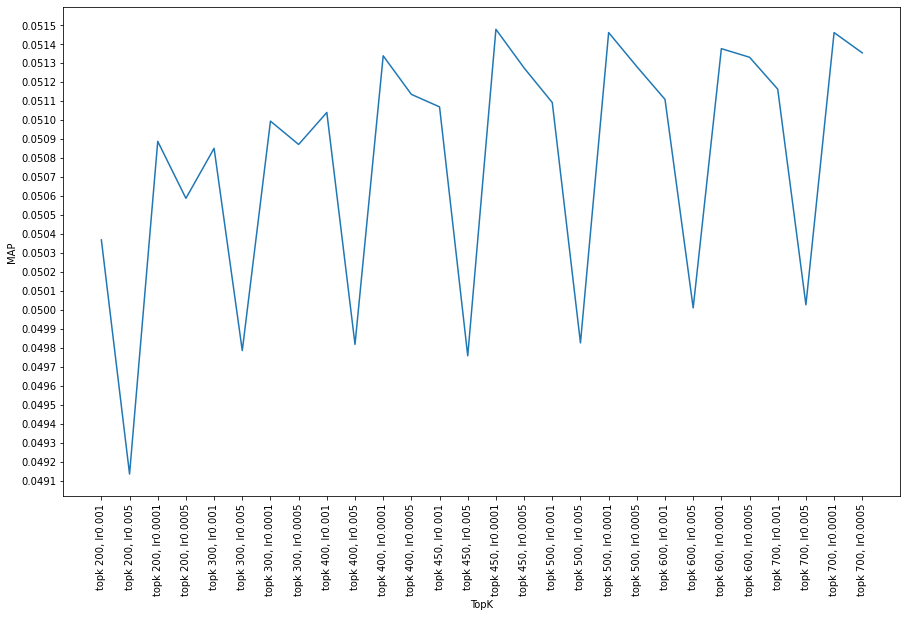

In [10]:
#best model: topk=700, lr = 0.0001. MAP = 0.0536, sgd_mode = adagrad.
#topk 450, lr0.0001, MAP 0.051 sgd_mode = Adam 
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
plt.plot(x_tick, collaborative_MAP, label="Collaborative")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0001))
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.xticks(rotation='vertical')
plt.show()

In [45]:
test_users = pd.read_csv('data_target_users_test.csv')
test_users

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
7939,7942
7940,7943
7941,7944
7942,7945


In [46]:
recommender = SLIM_BPR_Cython(URM_all, recompile_cython=False)
#remember to specify the positive threshold
recommender.fit(epochs=200, batch_size=1000, sgd_mode='adagrad', learning_rate=0.001, positive_threshold_BPR=1, topK=400)
user_id = test_users['user_id']
recommendations = recommender.recommend(user_id,cutoff = 10)


SLIM_BPR_Recommender: URM Detected 1079 (4.15 %) cold items.
Deallocating Cython objects
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Automatic selection of fastest train mode. Unable to get current RAM status, you may be using a non-Linux operating system. Using dense matrix.
Processed 7947 ( 100.00% ) in 0.15 seconds. BPR loss is 5.57E-08. Sample per second: 51615
SLIM_BPR_Recommender: Epoch 1 of 200. Elapsed time 0.02 sec
Processed 7947 ( 100.00% ) in 0.19 seconds. BPR loss is 2.19E-07. Sample per second: 41835
SLIM_BPR_Recommender: Epoch 2 of 200. Elapsed time 0.06 sec
Processed 7947 ( 100.00% ) in 0.22 seconds. BPR loss is 3.99E-07. Sample per second: 36136
SLIM_BPR_Recommender: Epoch 3 of 200. Elapsed time 0.09 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 5.18E-07. Sample per second: 31548
SLIM_BPR_Recommender: Epoch 4 of 200. Elapsed time 0.12 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 6.72E-07. Sample per second: 27

SLIM_BPR_Recommender: Epoch 53 of 200. Elapsed time 1.85 sec
Processed 7947 ( 100.00% ) in 1.02 seconds. BPR loss is 9.15E-06. Sample per second: 7813
SLIM_BPR_Recommender: Epoch 54 of 200. Elapsed time 1.89 sec
Processed 7947 ( 100.00% ) in 0.05 seconds. BPR loss is 9.34E-06. Sample per second: 171717
SLIM_BPR_Recommender: Epoch 55 of 200. Elapsed time 1.92 sec
Processed 7947 ( 100.00% ) in 0.09 seconds. BPR loss is 9.98E-06. Sample per second: 92139
SLIM_BPR_Recommender: Epoch 56 of 200. Elapsed time 1.96 sec
Processed 7947 ( 100.00% ) in 0.12 seconds. BPR loss is 1.00E-05. Sample per second: 68364
SLIM_BPR_Recommender: Epoch 57 of 200. Elapsed time 1.99 sec
Processed 7947 ( 100.00% ) in 0.14 seconds. BPR loss is 9.76E-06. Sample per second: 56277
SLIM_BPR_Recommender: Epoch 58 of 200. Elapsed time 2.01 sec
Processed 7947 ( 100.00% ) in 0.17 seconds. BPR loss is 1.07E-05. Sample per second: 46694
SLIM_BPR_Recommender: Epoch 59 of 200. Elapsed time 2.04 sec
Processed 7947 ( 100.00% ) 

SLIM_BPR_Recommender: Epoch 107 of 200. Elapsed time 3.45 sec
Processed 7947 ( 100.00% ) in 0.62 seconds. BPR loss is 2.00E-05. Sample per second: 12852
SLIM_BPR_Recommender: Epoch 108 of 200. Elapsed time 3.49 sec
Processed 7947 ( 100.00% ) in 0.65 seconds. BPR loss is 2.03E-05. Sample per second: 12145
SLIM_BPR_Recommender: Epoch 109 of 200. Elapsed time 3.52 sec
Processed 7947 ( 100.00% ) in 0.69 seconds. BPR loss is 1.94E-05. Sample per second: 11496
SLIM_BPR_Recommender: Epoch 110 of 200. Elapsed time 3.56 sec
Processed 7947 ( 100.00% ) in 0.72 seconds. BPR loss is 2.03E-05. Sample per second: 10988
SLIM_BPR_Recommender: Epoch 111 of 200. Elapsed time 3.59 sec
Processed 7947 ( 100.00% ) in 0.75 seconds. BPR loss is 2.07E-05. Sample per second: 10550
SLIM_BPR_Recommender: Epoch 112 of 200. Elapsed time 3.62 sec
Processed 7947 ( 100.00% ) in 0.78 seconds. BPR loss is 2.07E-05. Sample per second: 10160
SLIM_BPR_Recommender: Epoch 113 of 200. Elapsed time 3.65 sec
Processed 7947 ( 100

SLIM_BPR_Recommender: Epoch 161 of 200. Elapsed time 5.04 sec
Processed 7947 ( 100.00% ) in 0.20 seconds. BPR loss is 2.94E-05. Sample per second: 40165
SLIM_BPR_Recommender: Epoch 162 of 200. Elapsed time 5.07 sec
Processed 7947 ( 100.00% ) in 0.23 seconds. BPR loss is 2.91E-05. Sample per second: 35188
SLIM_BPR_Recommender: Epoch 163 of 200. Elapsed time 5.10 sec
Processed 7947 ( 100.00% ) in 0.25 seconds. BPR loss is 3.05E-05. Sample per second: 31311
SLIM_BPR_Recommender: Epoch 164 of 200. Elapsed time 5.12 sec
Processed 7947 ( 100.00% ) in 0.28 seconds. BPR loss is 2.95E-05. Sample per second: 28301
SLIM_BPR_Recommender: Epoch 165 of 200. Elapsed time 5.15 sec
Processed 7947 ( 100.00% ) in 0.30 seconds. BPR loss is 3.07E-05. Sample per second: 26074
SLIM_BPR_Recommender: Epoch 166 of 200. Elapsed time 5.17 sec
Processed 7947 ( 100.00% ) in 0.33 seconds. BPR loss is 3.17E-05. Sample per second: 24026
SLIM_BPR_Recommender: Epoch 167 of 200. Elapsed time 5.20 sec
Processed 7947 ( 100

In [47]:
for index in range(len(recommendations)):
    #print(element)
    recommendations[index]=np.array(recommendations[index])
    #print(type(element))
print(len(recommendations))

7944


In [48]:
test_users['item_list']= recommendations
#test_users['item_list'] =  test_users['item_list'].apply(lambda x: x.replace('[','').replace(']','')) 
test_users['item_list'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in test_users['item_list']])

#convert the string columns to int
#test_users['item_list'] = test_users['item_list'].astype(int)
test_users
test_users.to_csv('submission.csv', index=False)
